# Proyecto Contaminación

# Dynamic Time Wraping (DTW) para la comparación del curso de contaminantes y egresos

# Contaminante PM2_5

# (Año 2010)

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'PM2_5'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

timestamp   PM2_5
0      2003-06-01 00:00:00   99.00
1      2003-06-01 00:00:00   62.00
2      2003-06-01 00:00:00   29.00
3      2003-06-01 01:00:00   98.00
4      2003-06-01 01:00:00   75.00
...                    ...     ...
528438 2018-12-31 23:00:00   22.58
528439 2018-12-31 23:00:00  199.00
528440 2018-12-31 23:00:00  111.00
528441 2018-12-31 23:00:00  295.00
528442 2018-12-31 23:00:00    8.00

[528443 rows x 2 columns]

In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

timestamp   PM2_5
0       2003-06-01 00   99.00
1       2003-06-01 00   62.00
2       2003-06-01 00   29.00
3       2003-06-01 01   98.00
4       2003-06-01 01   75.00
...               ...     ...
528438  2018-12-31 23   22.58
528439  2018-12-31 23  199.00
528440  2018-12-31 23  111.00
528441  2018-12-31 23  295.00
528442  2018-12-31 23    8.00

[528443 rows x 2 columns]

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2010'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2010-01-01 00   15.0
1      2010-01-01 00   40.0
2      2010-01-01 00   31.0
3      2010-01-01 00   33.0
4      2010-01-01 00   18.0
...              ...    ...
41899  2010-12-31 23   55.0
41900  2010-12-31 23   60.0
41901  2010-12-31 23  244.0
41902  2010-12-31 23  105.0
41903  2010-12-31 23   65.0

[41904 rows x 2 columns]

In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2010-01-01 00:00:00   15.0
1     2010-01-01 00:00:00   40.0
2     2010-01-01 00:00:00   31.0
3     2010-01-01 00:00:00   33.0
4     2010-01-01 00:00:00   18.0
...                   ...    ...
41899 2010-12-31 23:00:00   55.0
41900 2010-12-31 23:00:00   60.0
41901 2010-12-31 23:00:00  244.0
41902 2010-12-31 23:00:00  105.0
41903 2010-12-31 23:00:00   65.0

[41904 rows x 2 columns]

In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2010-01-01 00:00:00   15.0   52
1     2010-01-01 00:00:00   40.0   52
2     2010-01-01 00:00:00   31.0   52
3     2010-01-01 00:00:00   33.0   52
4     2010-01-01 00:00:00   18.0   52
...                   ...    ...  ...
41899 2010-12-31 23:00:00   55.0   52
41900 2010-12-31 23:00:00   60.0   52
41901 2010-12-31 23:00:00  244.0   52
41902 2010-12-31 23:00:00  105.0   52
41903 2010-12-31 23:00:00   65.0   52

[41904 rows x 3 columns]

In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        19/01/2010     O829
1        16/02/2010     J189
2        23/03/2010     N814
3        17/04/2010     O759
4        22/05/2010     K359
...             ...      ...
2634334  21/07/2010     O064
2634335  21/05/2010     S822
2634336  23/03/2010     K802
2634337  17/08/2010     O809
2634338  21/12/2010     C629

[2634339 rows x 2 columns]

In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2010-01-19     O829    3
1       2010-02-16     J189    7
2       2010-03-23     N814   12
3       2010-04-17     O759   15
4       2010-05-22     K359   20
...            ...      ...  ...
2597279 2010-07-21     O064   29
2597280 2010-05-21     S822   20
2597281 2010-03-23     K802   12
2597282 2010-08-17     O809   33
2597283 2010-12-21     C629   51

[2597284 rows x 3 columns]

In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     43463
2     48020
3     49300
4     50404
5     46716
6     50279
7     49462
8     50102
9     51123
10    52219
11    48527
12    51158
13    46652
14    48200
15    49187
16    49499
17    51348
18    48072
19    50004
20    50627
21    51101
22    51157
23    51436
24    49970
25    49757
26    49682
27    50141
28    50981
29    50164
30    50925
31    51991
32    52355
33    52240
34    53192
35    54220
36    55165
37    48947
38    54466
39    54926
40    54540
41    54019
42    54255
43    52924
44    47914
45    52907
46    50233
47    52802
48    51769
49    51864
50    51110
51    47295
52     8474
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  23.9716
1     2  21.2561
2     3  30.1594
3     4  19.4752
4     5  28.6189
5     6  21.9165
6     7  21.9724
7     8   17.679
8     9  16.9472
9    10  26.5534
10   11   19.873
11   12  19.7921
12   13  24.1079
13   14  26.6013
14   15  17.4495
15   16  19.5231
16   17  22.6129
17   18  25.8027
18   19  34.2295
19   20  26.6356
20   21  21.0013
21   22  31.1939
22   23  35.8773
23   24  19.2958
24   25  20.6767
25   26  22.7686
26   27  18.8147
27   28  28.2313
28   29  19.7482
29   30  22.3593
30   31  26.1211
31   32  31.2325
32   33   23.993
33   34  26.8667
34   35  23.9586
35   36  30.4992
36   37  21.0142
37   38  19.6893
38   39  25.9185
39   40  22.1538
40   41  27.1249
41   42    33.12
42   43  31.1119
43   44  24.0069
44   45  28.2505
45   46  25.9089
46   47  36.5552
47   48  34.1479
48   49  31.5212
49   50  27.5048
50   51  39.4307
51   52  27.6151


2010

PM2_5 & O809


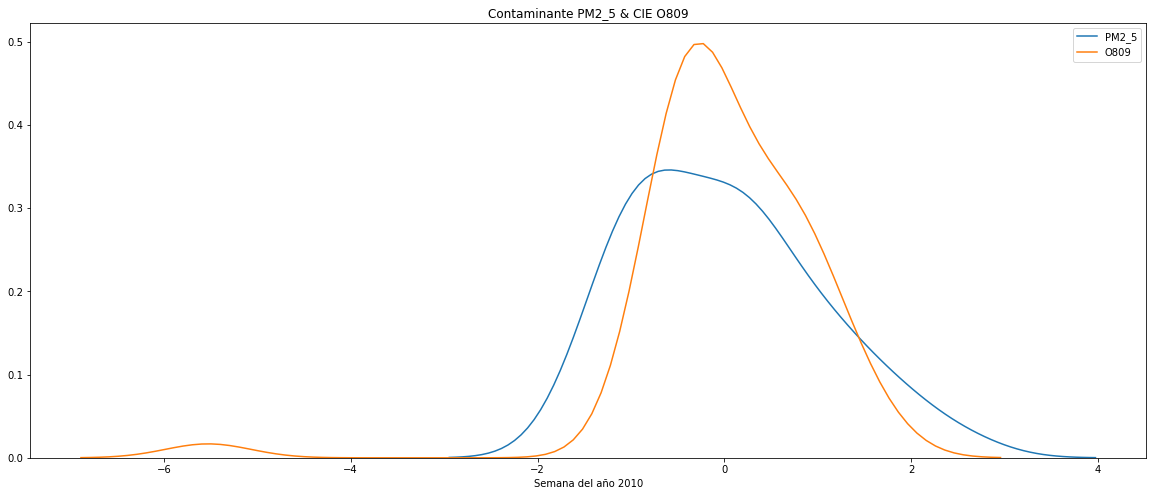


PM2_5 & O829


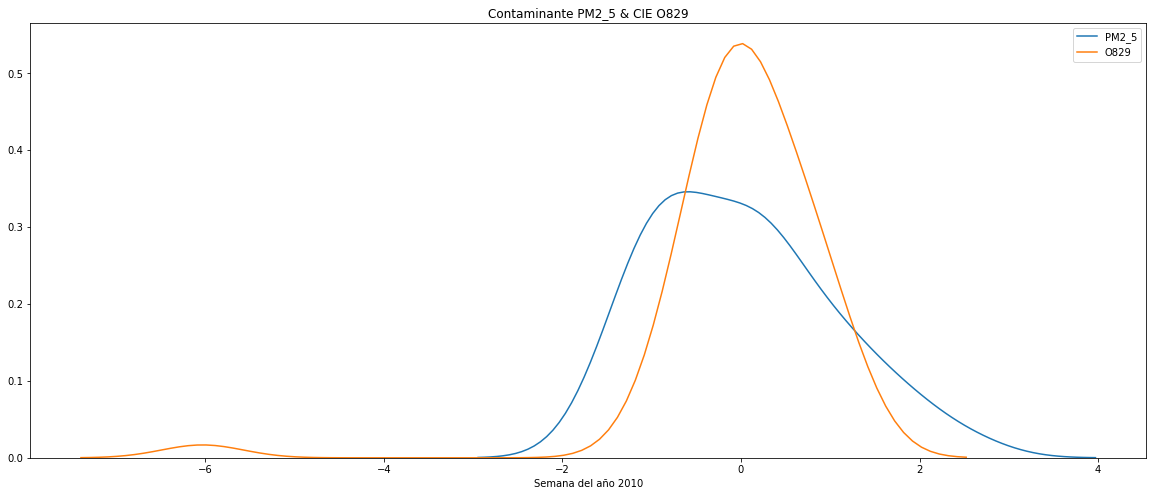


PM2_5 & O800


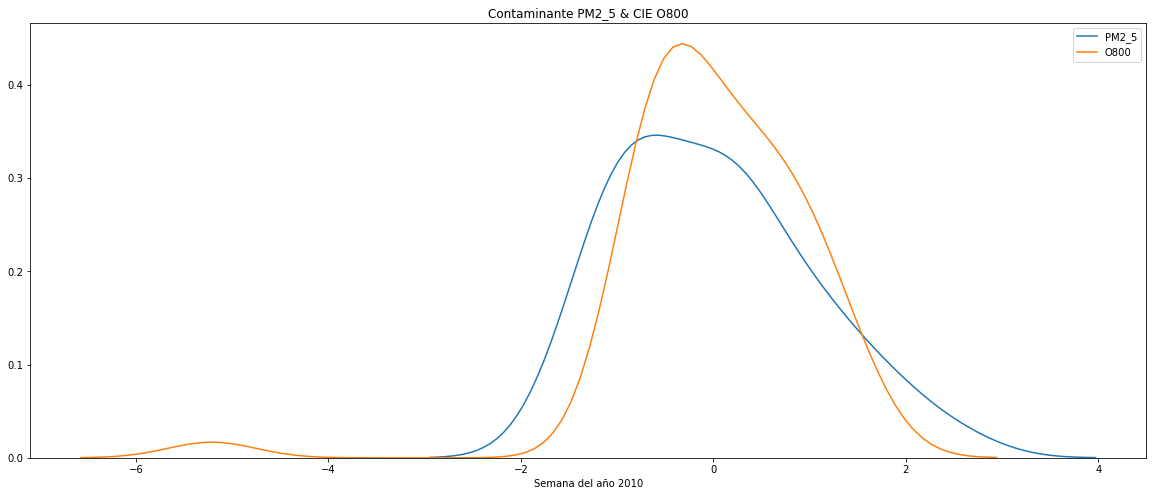


PM2_5 & O064


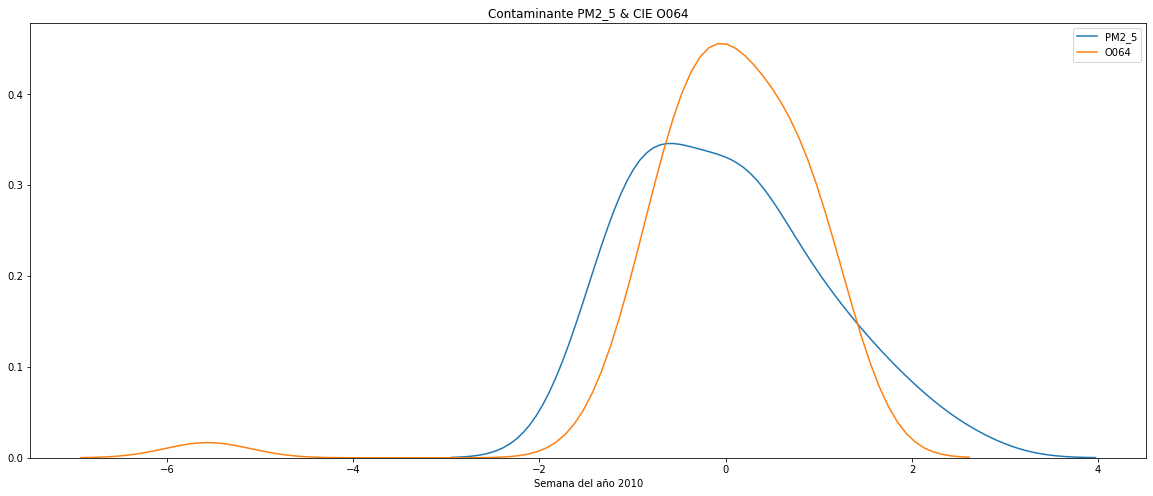


PM2_5 & N189


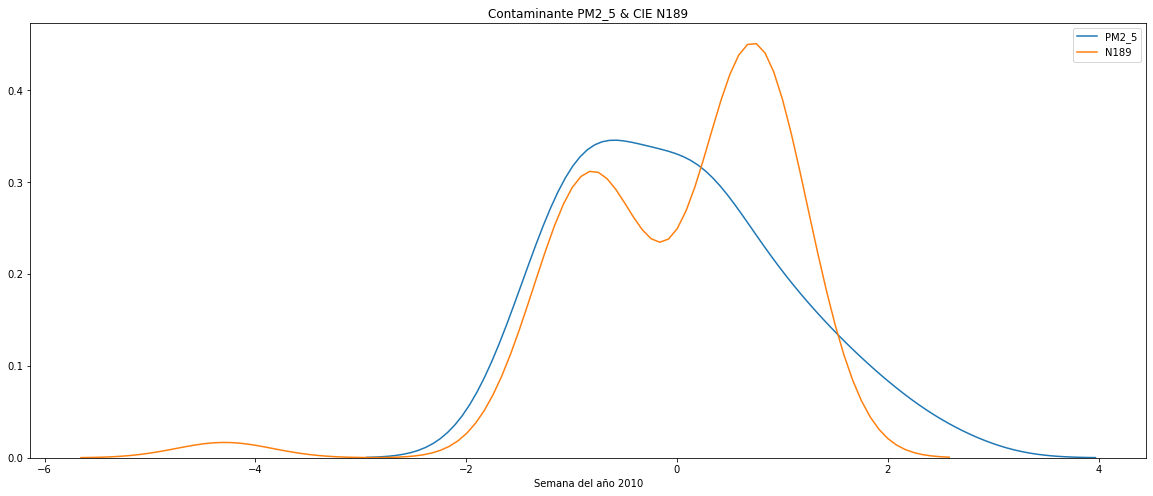


PM2_5 & O342


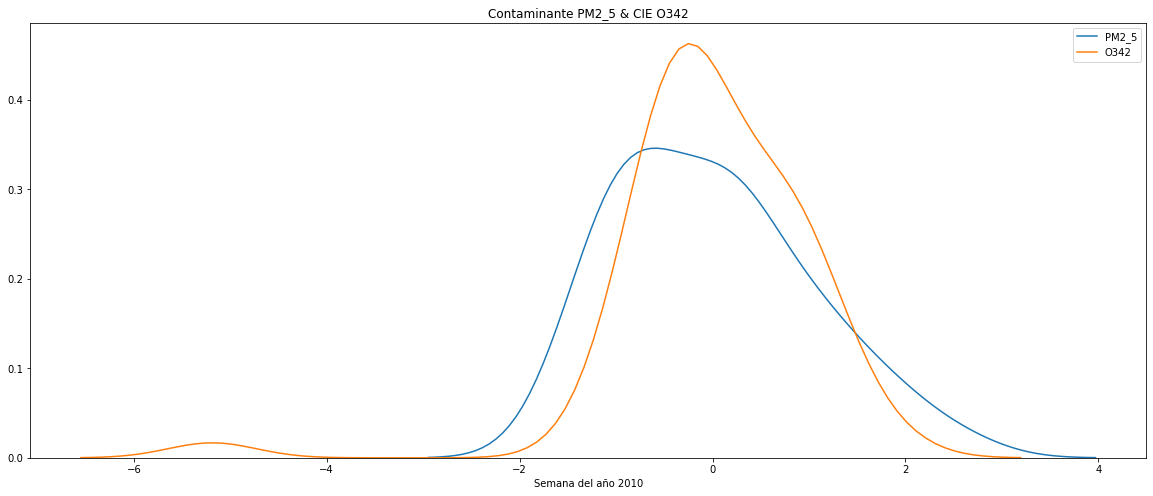


PM2_5 & K359


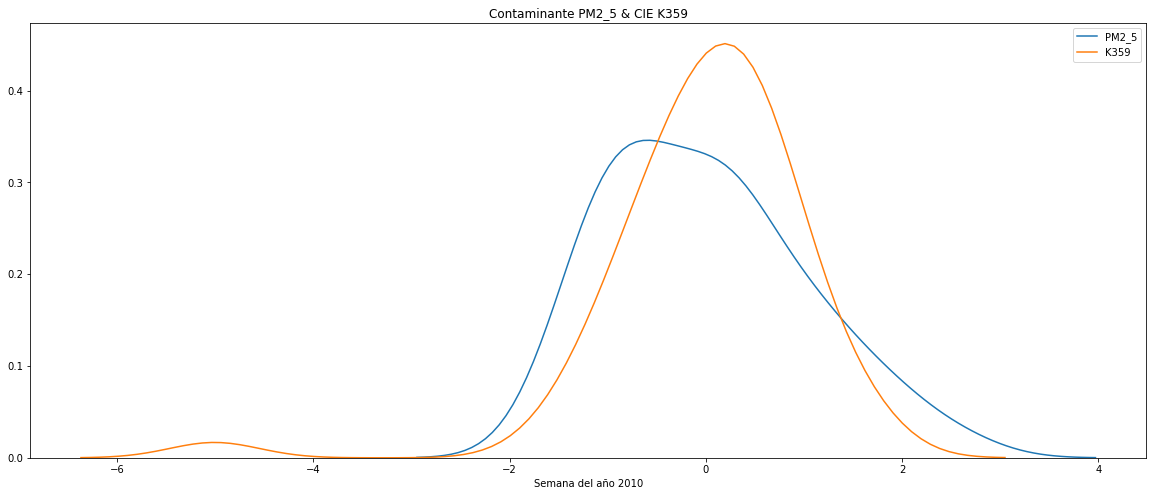


PM2_5 & H


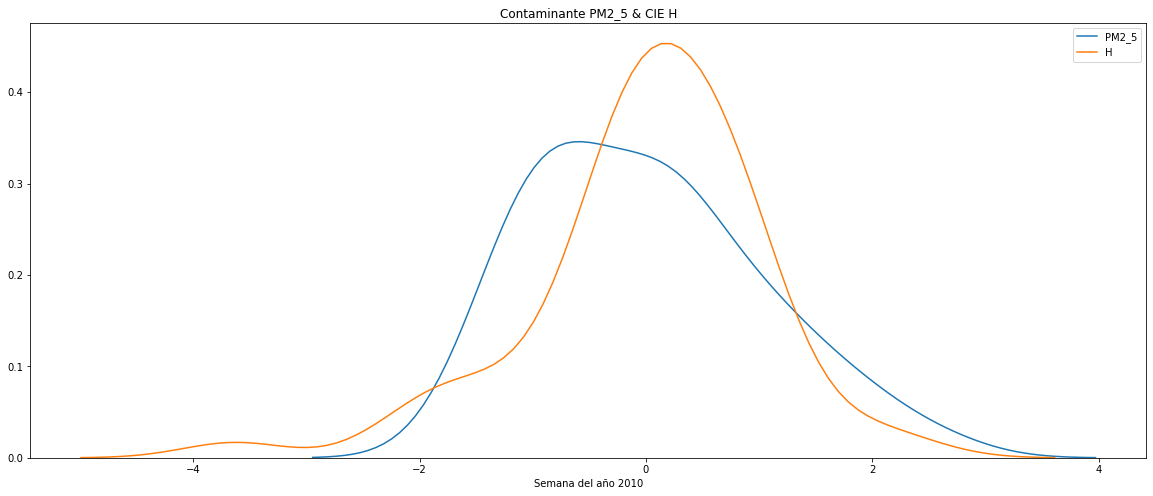


PM2_5 & I


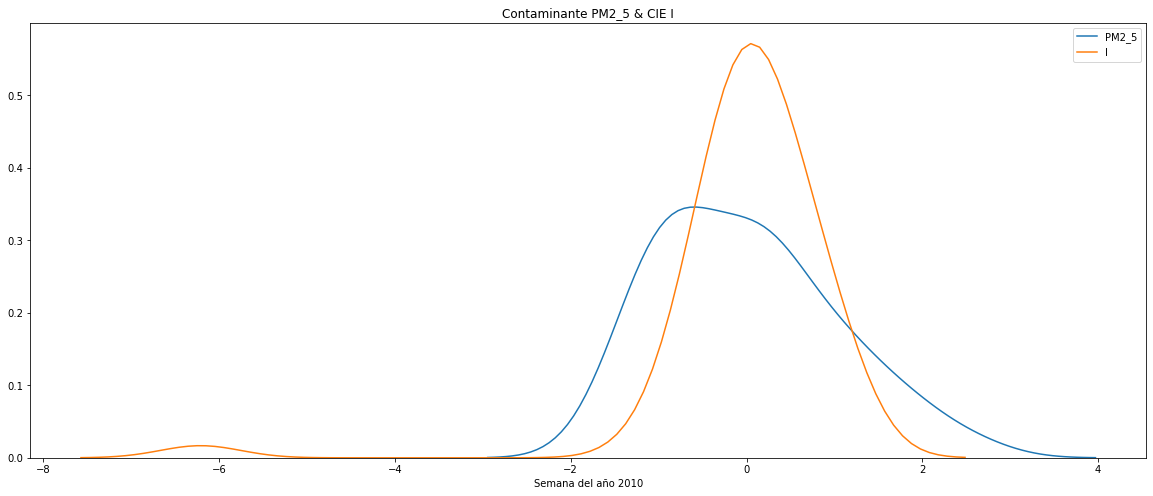


PM2_5 & J


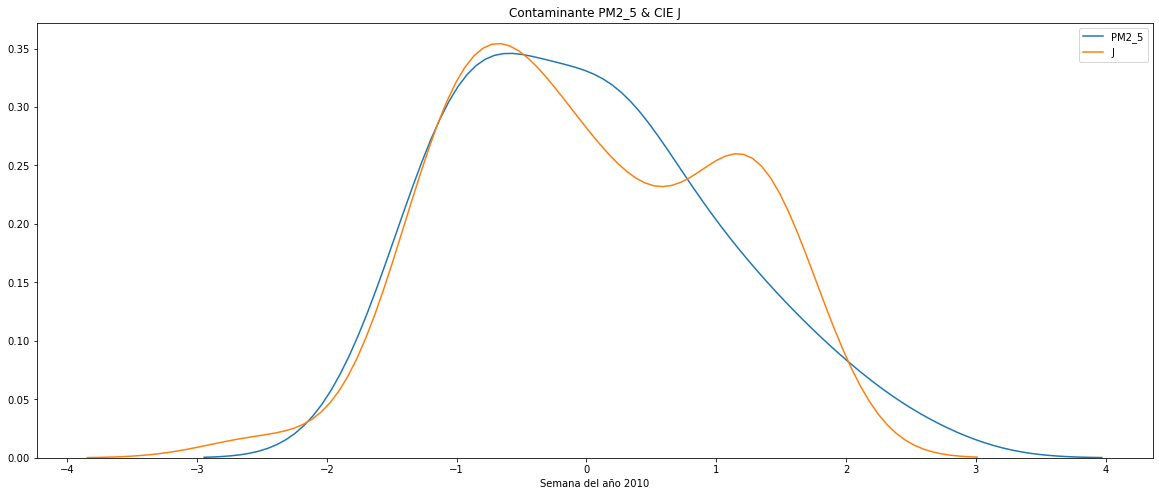

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2011)


In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2011'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2011-01-01 00  107.0
1      2011-01-01 00  150.0
2      2011-01-01 00  410.0
3      2011-01-01 00   97.0
4      2011-01-01 00   59.0
...              ...    ...
45417  2011-12-31 23  130.0
45418  2011-12-31 23  769.0
45419  2011-12-31 23   99.0
45420  2011-12-31 23  270.0
45421  2011-12-31 23  637.0

[45422 rows x 2 columns]

In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2011-01-01 00:00:00  107.0
1     2011-01-01 00:00:00  150.0
2     2011-01-01 00:00:00  410.0
3     2011-01-01 00:00:00   97.0
4     2011-01-01 00:00:00   59.0
...                   ...    ...
45417 2011-12-31 23:00:00  130.0
45418 2011-12-31 23:00:00  769.0
45419 2011-12-31 23:00:00   99.0
45420 2011-12-31 23:00:00  270.0
45421 2011-12-31 23:00:00  637.0

[45422 rows x 2 columns]

In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2011-01-01 00:00:00  107.0   52
1     2011-01-01 00:00:00  150.0   52
2     2011-01-01 00:00:00  410.0   52
3     2011-01-01 00:00:00   97.0   52
4     2011-01-01 00:00:00   59.0   52
...                   ...    ...  ...
45417 2011-12-31 23:00:00  130.0   52
45418 2011-12-31 23:00:00  769.0   52
45419 2011-12-31 23:00:00   99.0   52
45420 2011-12-31 23:00:00  270.0   52
45421 2011-12-31 23:00:00  637.0   52

[45422 rows x 3 columns]

In [14]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        22/03/2011     T311
1        22/03/2011     K579
2        22/03/2011     L039
3        04/04/2011     K359
4        05/04/2011     J189
...             ...      ...
1048567  21/09/2011     I091
1048568  21/09/2011     I350
1048569  22/09/2011     I471
1048570  22/09/2011     I739
1048571  23/09/2011     I258

[1048559 rows x 2 columns]

In [15]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2011-03-22     T311   12
1       2011-03-22     K579   12
2       2011-03-22     L039   12
3       2011-04-04     K359   14
4       2011-04-05     J189   14
...            ...      ...  ...
1032381 2011-09-21     I091   38
1032382 2011-09-21     I350   38
1032383 2011-09-22     I471   38
1032384 2011-09-22     I739   38
1032385 2011-09-23     I258   38

[1032386 rows x 3 columns]

In [16]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17352
2     18696
3     19496
4     19507
5     19332
6     18294
7     19327
8     19752
9     19824
10    19289
11    19828
12    18756
13    19630
14    19820
15    19684
16    17260
17    18346
18    17878
19    18577
20    19349
21    19384
22    19016
23    19569
24    19636
25    19737
26    19807
27    19845
28    20238
29    20570
30    20463
31    20628
32    21214
33    21237
34    21296
35    21472
36    21765
37    20779
38    21674
39    23011
40    22644
41    22416
42    22546
43    22094
44    20010
45    22360
46    21769
47    21130
48    21236
49    20987
50    20903
51    19862
52     3091
Name: sem, dtype: int64

In [17]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  34.7639
1     2  26.3062
2     3  35.8484
3     4  33.1515
4     5  24.0992
5     6   24.856
6     7  38.0651
7     8  35.8621
8     9  30.4848
9    10   24.833
10   11  31.1742
11   12  31.8117
12   13  36.1009
13   14  35.8888
14   15  31.9733
15   16  43.9342
16   17  36.7762
17   18  24.5171
18   19    45.44
19   20  35.1134
20   21  45.5076
21   22  27.1806
22   23  19.6119
23   24  23.3603
24   25  22.1492
25   26  18.0257
26   27  26.1779
27   28  18.9907
28   29  23.6496
29   30  21.9434
30   31  20.9975
31   32  27.0605
32   33  20.1075
33   34  14.6288
34   35  16.2778
35   36  23.5953
36   37  16.1581
37   38  19.3667
38   39  19.6808
39   40  14.3642
40   41  20.2927
41   42  23.0454
42   43  20.4258
43   44  21.2714
44   45  19.6505
45   46  25.0214
46   47  22.1626
47   48  25.0646
48   49   20.687
49   50  27.2526
50   51  18.5172
51   52  32.9788


2011

PM2_5 & O809


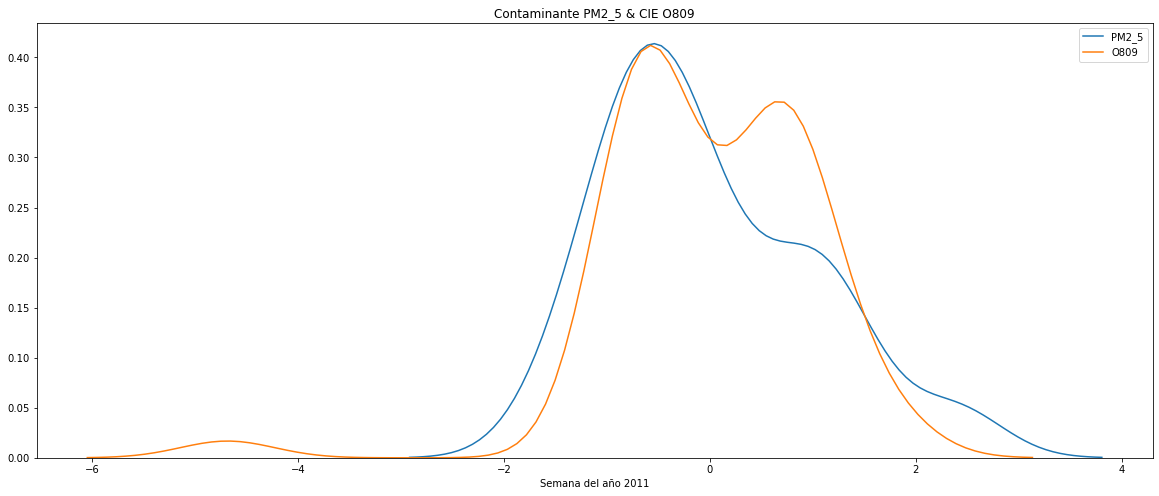


PM2_5 & O800


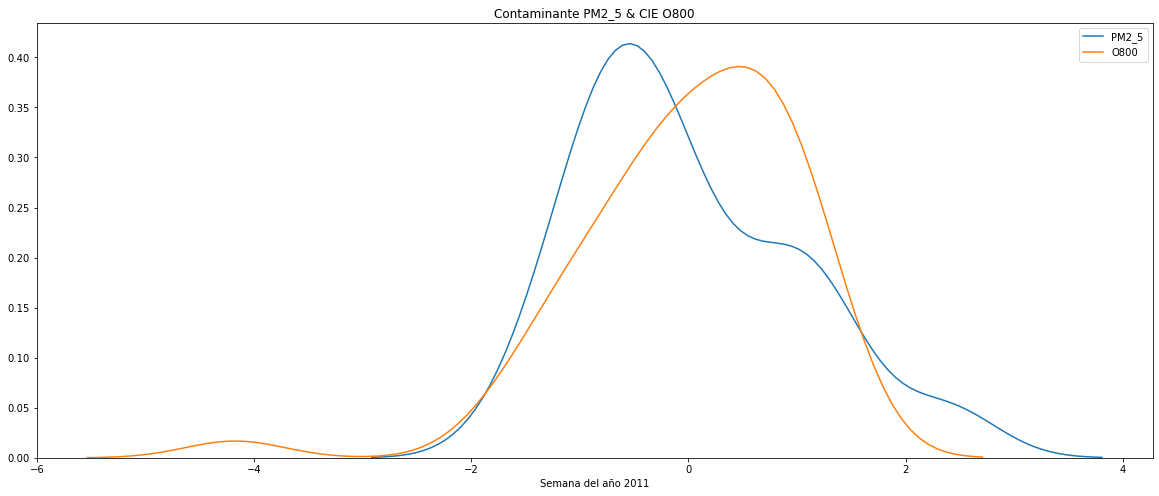


PM2_5 & O064


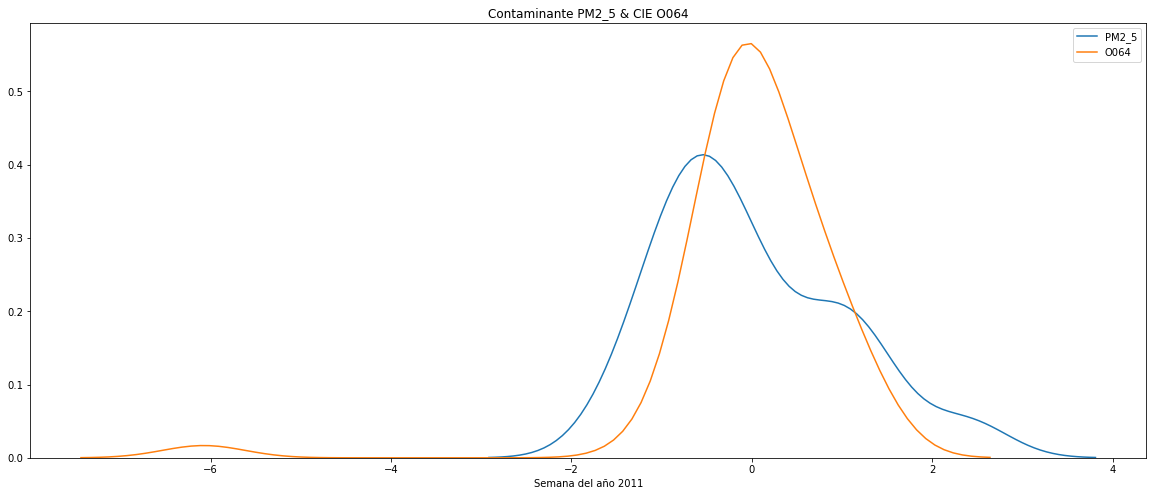


PM2_5 & O342


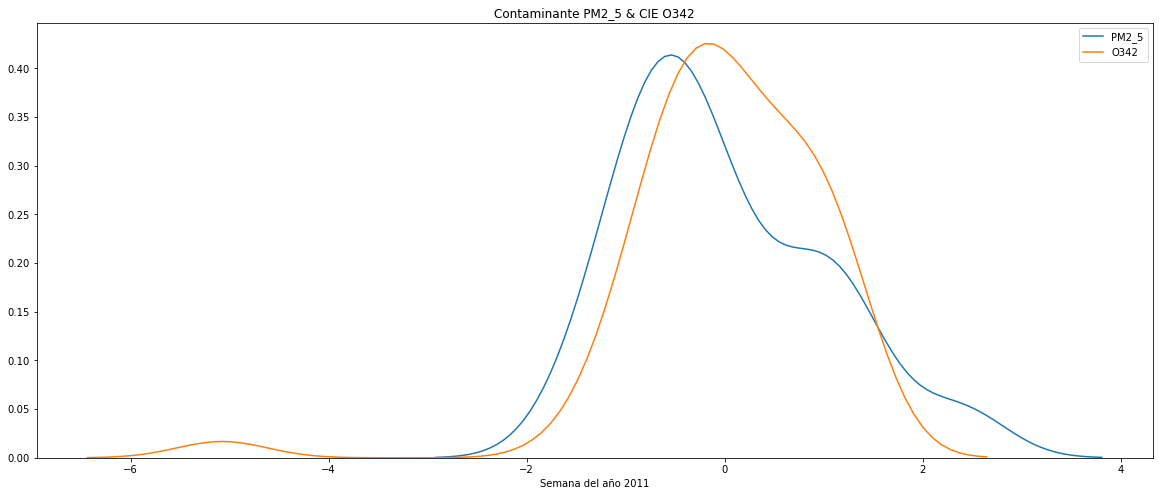


PM2_5 & O829


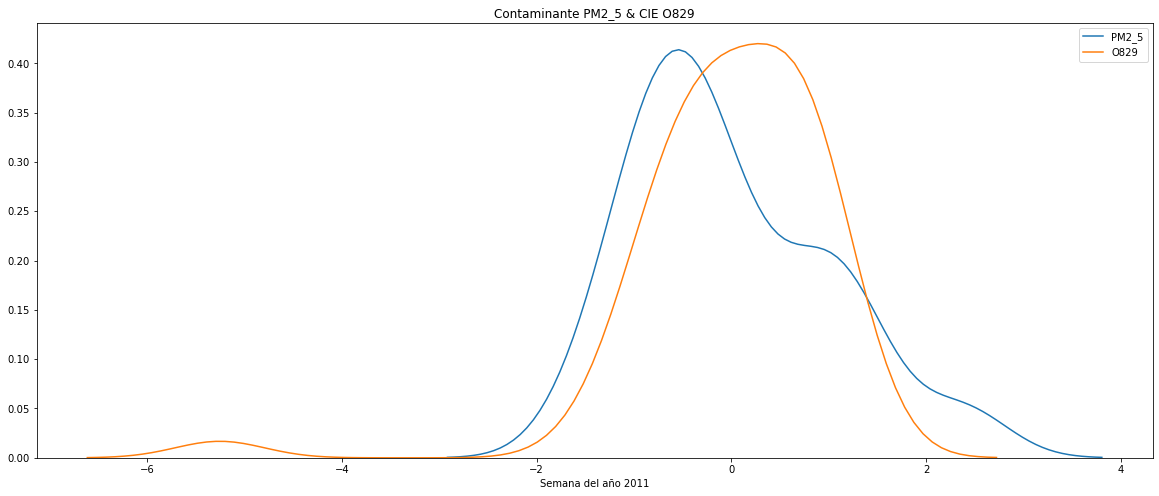


PM2_5 & N189


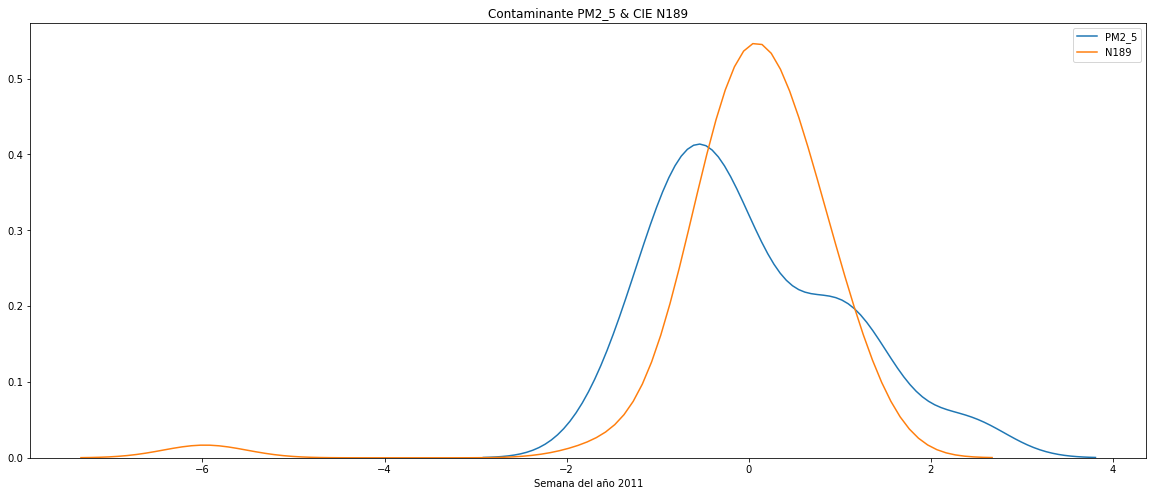


PM2_5 & N180


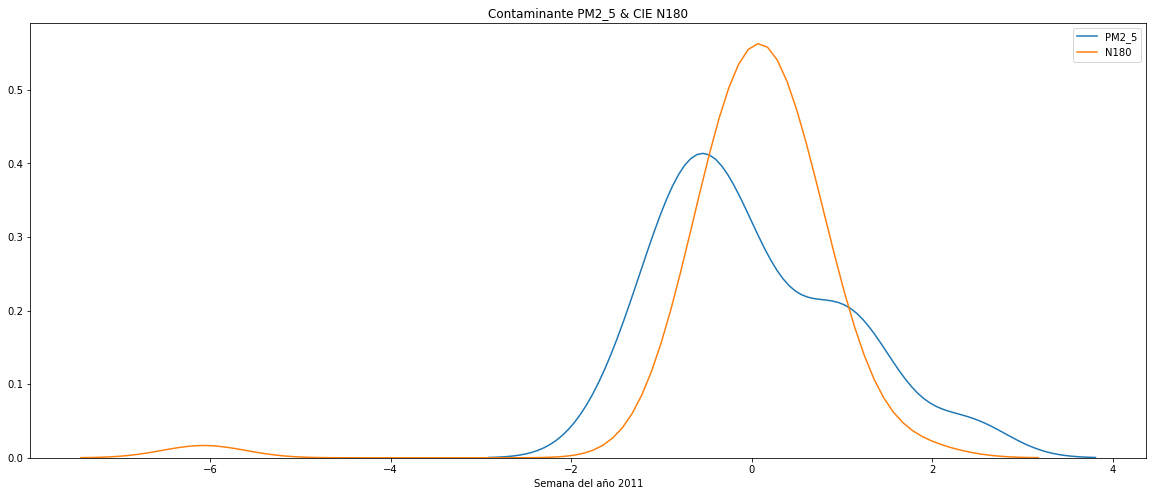


PM2_5 & H


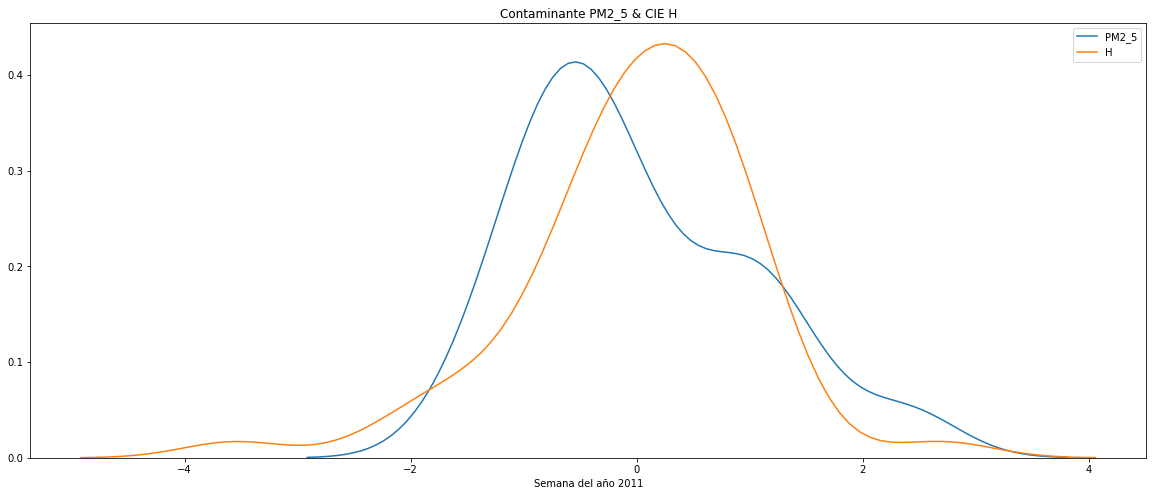


PM2_5 & I


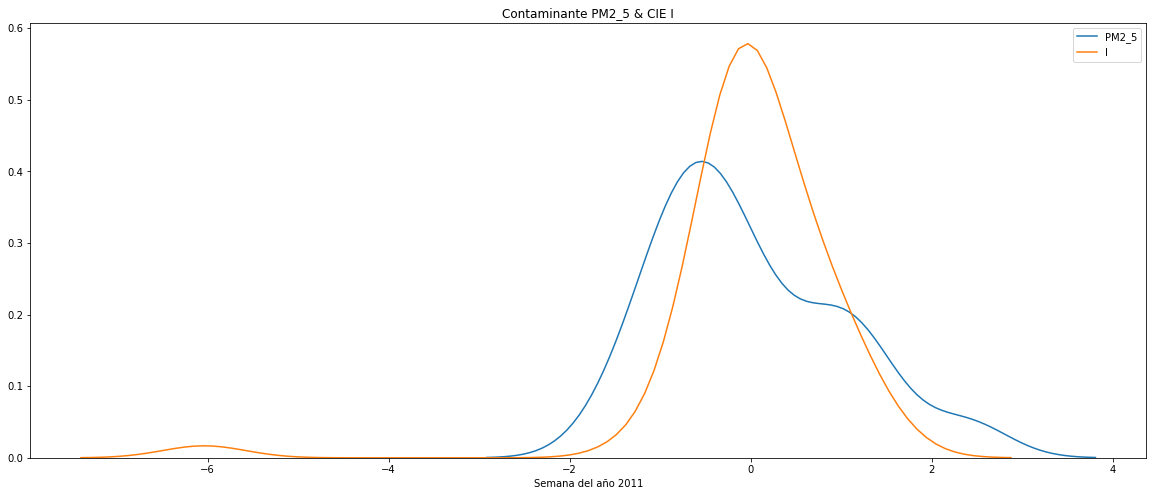


PM2_5 & J


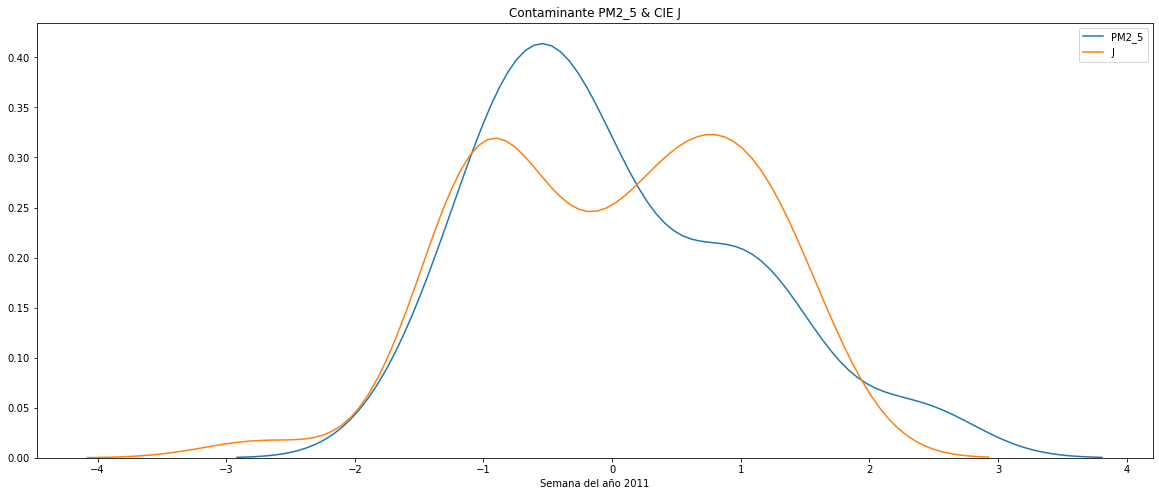

In [18]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2012)

In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2012'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2012-01-01 00  158.0
1      2012-01-01 00  695.0
2      2012-01-01 00  115.0
3      2012-01-01 00  255.0
4      2012-01-01 00  860.0
...              ...    ...
47030  2012-12-31 22  232.0
47031  2012-12-31 23  355.0
47032  2012-12-31 23  801.0
47033  2012-12-31 23  121.0
47034  2012-12-31 23  200.0

[47035 rows x 2 columns]

In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2012-01-01 00:00:00  158.0
1     2012-01-01 00:00:00  695.0
2     2012-01-01 00:00:00  115.0
3     2012-01-01 00:00:00  255.0
4     2012-01-01 00:00:00  860.0
...                   ...    ...
47030 2012-12-31 22:00:00  232.0
47031 2012-12-31 23:00:00  355.0
47032 2012-12-31 23:00:00  801.0
47033 2012-12-31 23:00:00  121.0
47034 2012-12-31 23:00:00  200.0

[47035 rows x 2 columns]

In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2012-01-01 00:00:00  158.0    1
1     2012-01-01 00:00:00  695.0    1
2     2012-01-01 00:00:00  115.0    1
3     2012-01-01 00:00:00  255.0    1
4     2012-01-01 00:00:00  860.0    1
...                   ...    ...  ...
47030 2012-12-31 22:00:00  232.0    1
47031 2012-12-31 23:00:00  355.0    1
47032 2012-12-31 23:00:00  801.0    1
47033 2012-12-31 23:00:00  121.0    1
47034 2012-12-31 23:00:00  200.0    1

[47035 rows x 3 columns]

In [22]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        31/01/2012     N879
1        31/01/2012     O829
2        30/01/2012     O809
3        29/01/2012     O600
4        27/01/2012     O809
...             ...      ...
1048570  20/08/2012     C509
1048571  20/08/2012     C509
1048572  20/08/2012     C509
1048573  20/08/2012     C504
1048574  20/08/2012     C349

[1048553 rows x 2 columns]

In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2012-01-31     N879    5
1       2012-01-31     O829    5
2       2012-01-30     O809    5
3       2012-01-29     O600    5
4       2012-01-27     O809    4
...            ...      ...  ...
1031354 2012-08-20     C509   34
1031355 2012-08-20     C509   34
1031356 2012-08-20     C509   34
1031357 2012-08-20     C504   34
1031358 2012-08-20     C349   34

[1031359 rows x 3 columns]

In [24]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     18779
2     21239
3     21814
4     21843
5     21599
6     20500
7     21971
8     21587
9     22496
10    22702
11    22764
12    21001
13    22828
14    20586
15    21345
16    22002
17    22369
18    21219
19    22078
20    22397
21    22780
22    22819
23    22913
24    22732
25    22251
26    19190
27    18462
28    18710
29    18718
30    18512
31    18944
32    18725
33    18393
34    18694
35    19395
36    19720
37    19381
38    18956
39    19045
40    18645
41    18980
42    18468
43    18446
44    17378
45    17753
46    18327
47    16771
48    18050
49    17672
50    17094
51    16777
52     5539
Name: sem, dtype: int64

In [25]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  31.9499
1     2  23.4803
2     3  30.6719
3     4  27.0427
4     5  25.1176
5     6  18.4778
6     7  22.1887
7     8  19.7076
8     9  25.5917
9    10  16.1039
10   11  20.6405
11   12  21.6565
12   13  22.8012
13   14  23.1321
14   15  19.1599
15   16  19.0207
16   17  20.6159
17   18  29.1251
18   19  22.6429
19   20  17.1822
20   21  21.9925
21   22  19.4754
22   23  17.9168
23   24  21.9121
24   25  14.9323
25   26   20.991
26   27  17.8538
27   28  20.2892
28   29  19.9926
29   30  21.5791
30   31  23.1071
31   32  16.0741
32   33  16.6281
33   34  16.3086
34   35  19.4592
35   36   24.416
36   37  15.2533
37   38  19.1114
38   39  15.2806
39   40  17.8232
40   41  16.0173
41   42  22.4015
42   43  19.6369
43   44  22.6443
44   45  22.3322
45   46  15.4467
46   47  21.4367
47   48  29.1245
48   49  36.5114
49   50  31.2416
50   51  26.8688
51   52  30.8123


2012

PM2_5 & O809


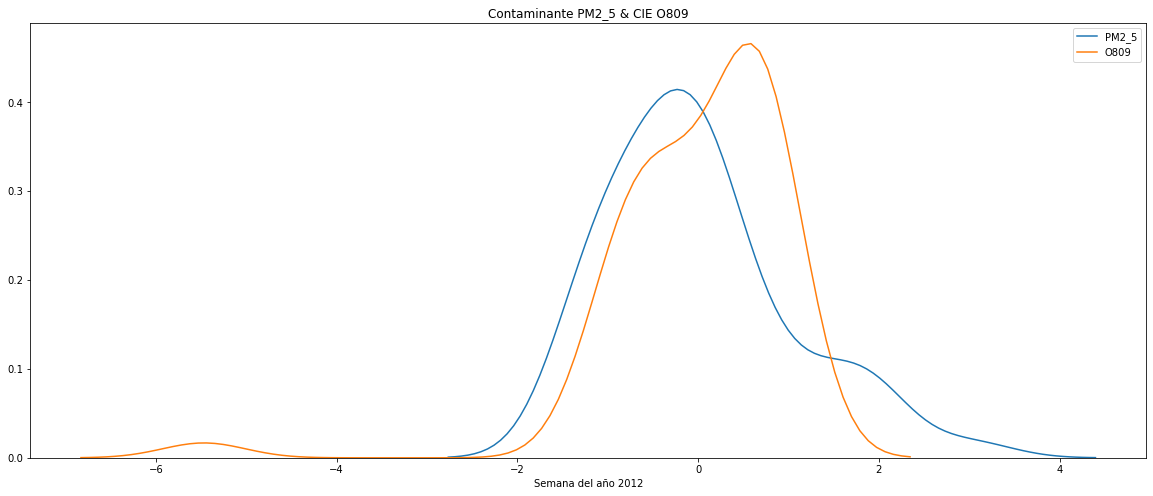


PM2_5 & O800


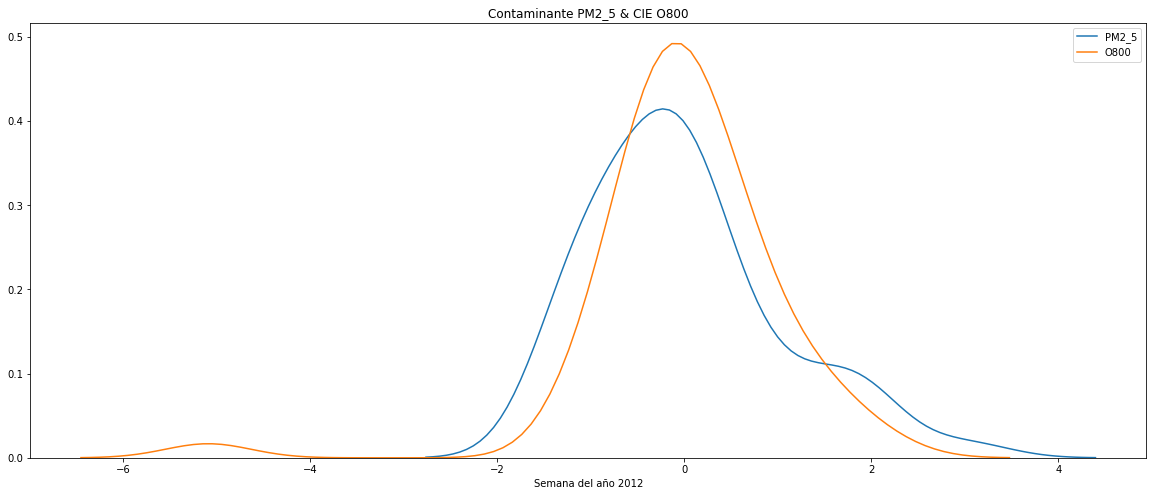


PM2_5 & O829


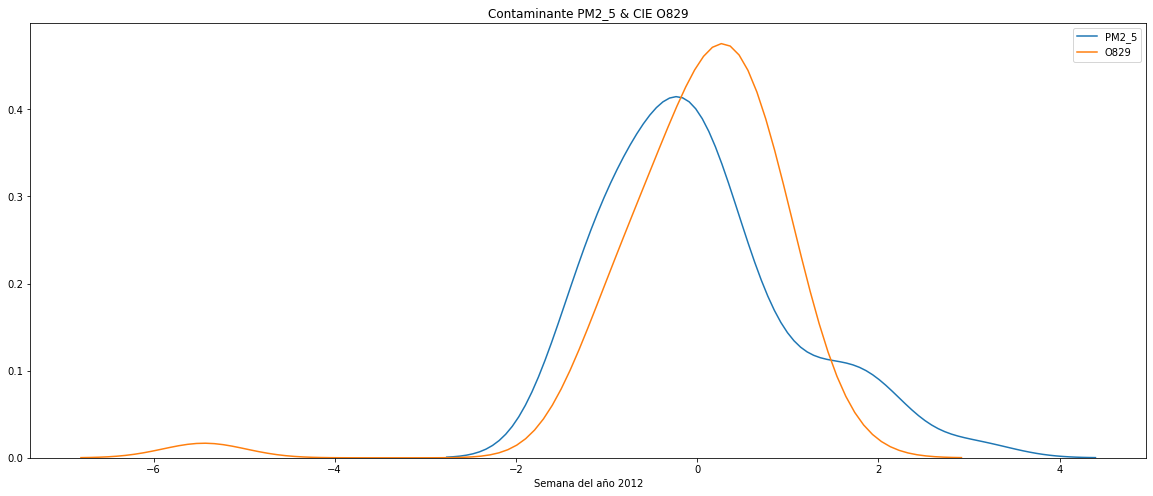


PM2_5 & O064


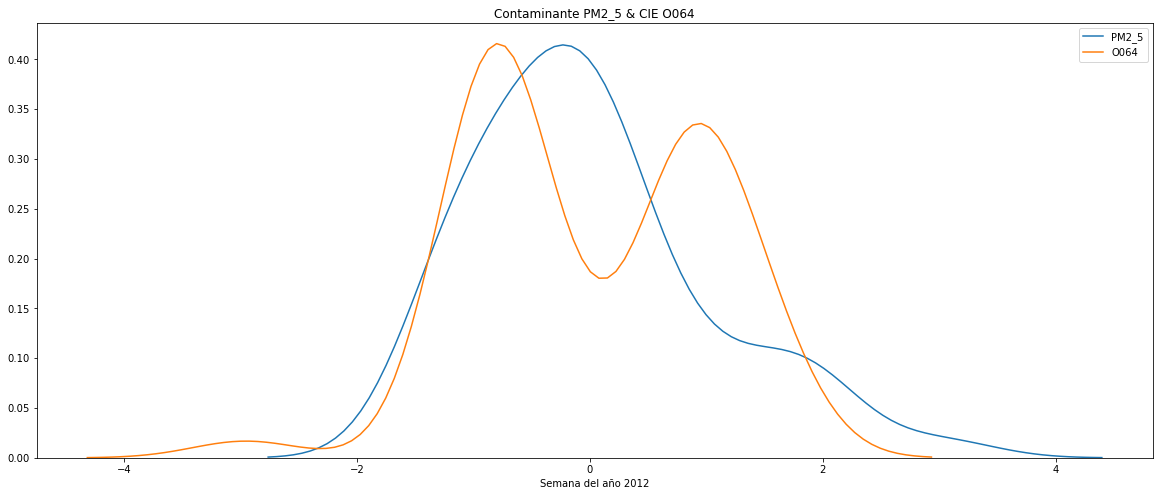


PM2_5 & N189


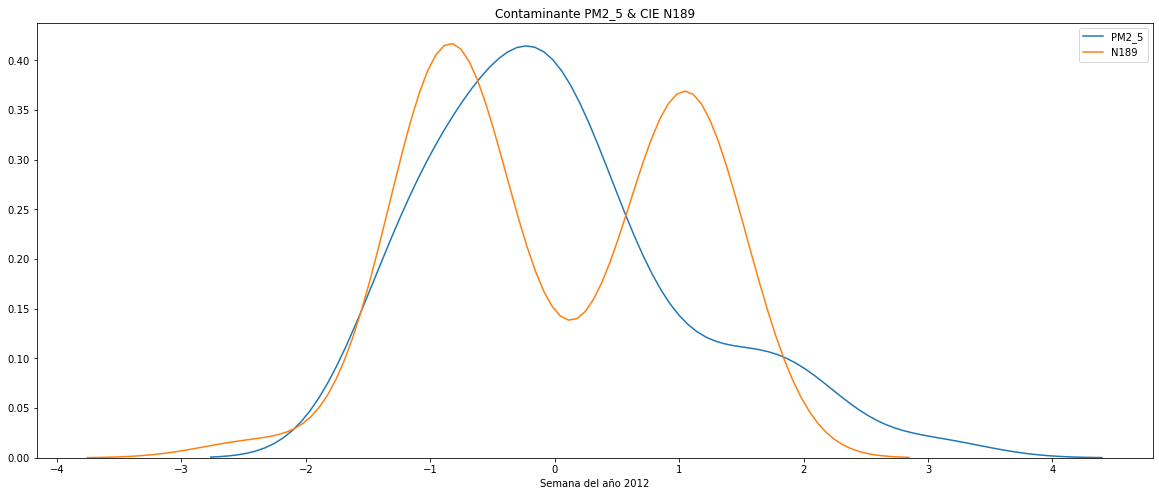


PM2_5 & O342


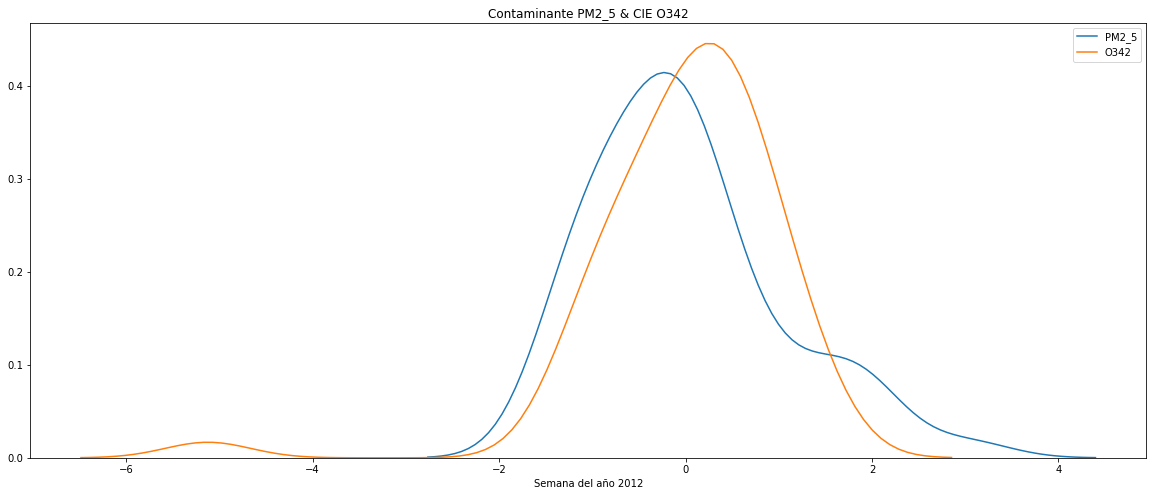


PM2_5 & K359


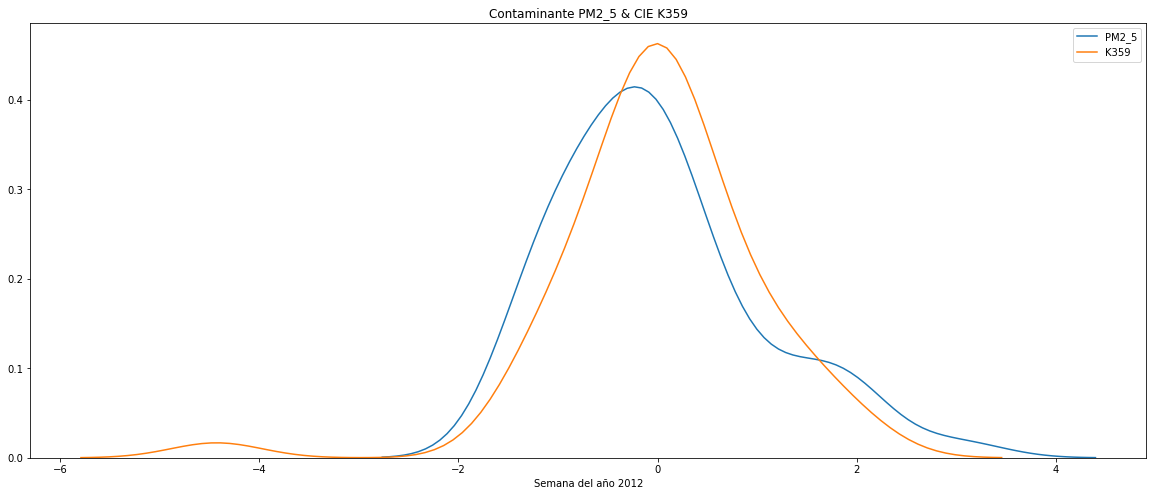


PM2_5 & H


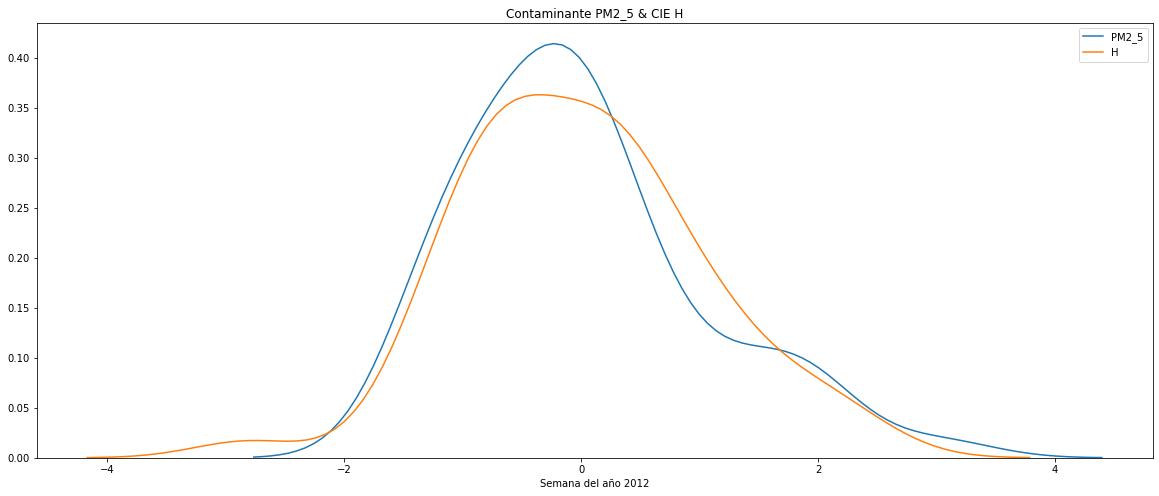


PM2_5 & I


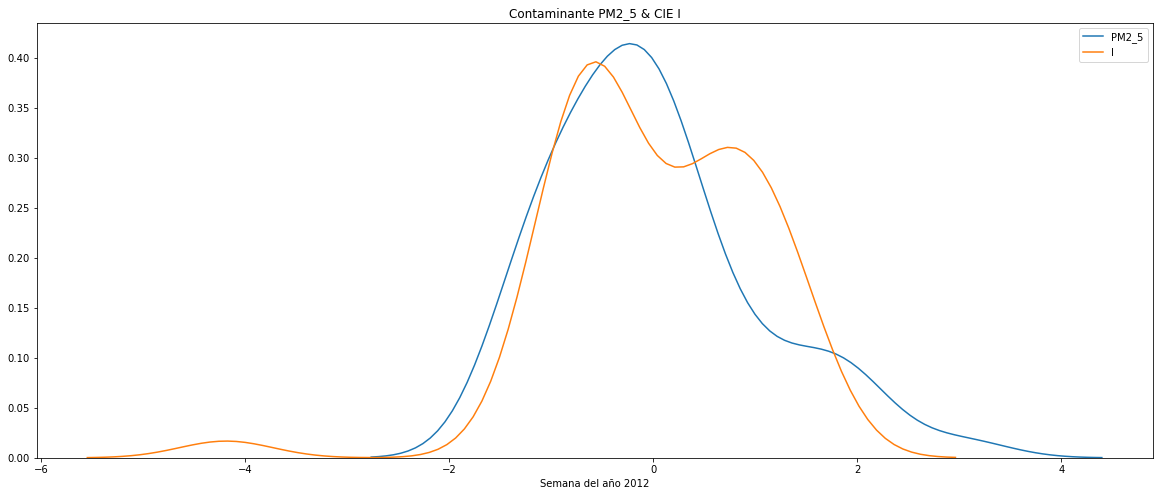


PM2_5 & J


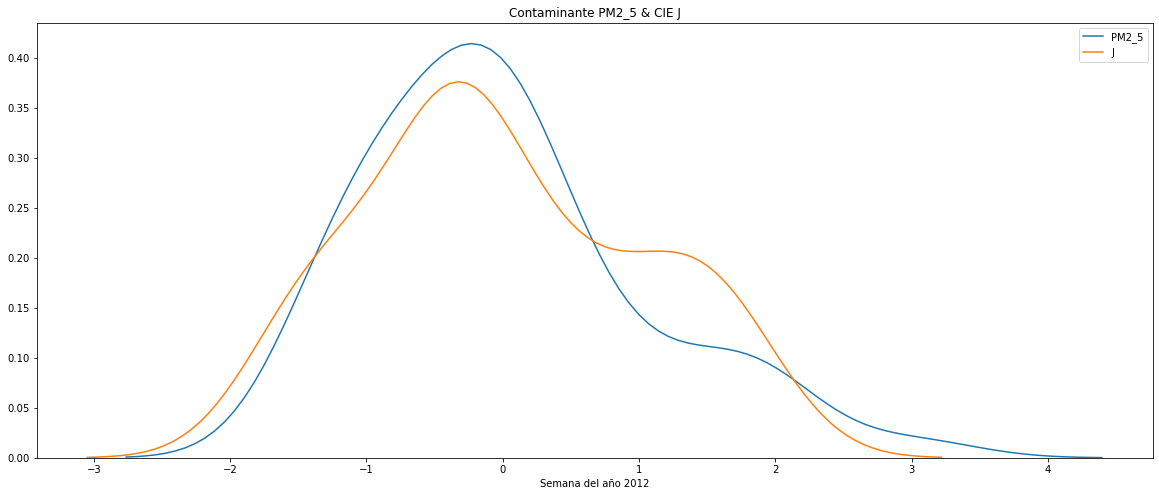

In [26]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2013)

In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2013'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2013-01-01 00  255.0
1      2013-01-01 00  628.0
2      2013-01-01 00  146.0
3      2013-01-01 00  628.0
4      2013-01-01 00  351.0
...              ...    ...
25998  2013-12-31 22  209.0
25999  2013-12-31 22   71.0
26000  2013-12-31 23  132.0
26001  2013-12-31 23  196.0
26002  2013-12-31 23  118.0

[26003 rows x 2 columns]

In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2013-01-01 00:00:00  255.0
1     2013-01-01 00:00:00  628.0
2     2013-01-01 00:00:00  146.0
3     2013-01-01 00:00:00  628.0
4     2013-01-01 00:00:00  351.0
...                   ...    ...
25998 2013-12-31 22:00:00  209.0
25999 2013-12-31 22:00:00   71.0
26000 2013-12-31 23:00:00  132.0
26001 2013-12-31 23:00:00  196.0
26002 2013-12-31 23:00:00  118.0

[26003 rows x 2 columns]

In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2013-01-01 00:00:00  255.0    1
1     2013-01-01 00:00:00  628.0    1
2     2013-01-01 00:00:00  146.0    1
3     2013-01-01 00:00:00  628.0    1
4     2013-01-01 00:00:00  351.0    1
...                   ...    ...  ...
25998 2013-12-31 22:00:00  209.0    1
25999 2013-12-31 22:00:00   71.0    1
26000 2013-12-31 23:00:00  132.0    1
26001 2013-12-31 23:00:00  196.0    1
26002 2013-12-31 23:00:00  118.0    1

[26003 rows x 3 columns]

In [30]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        26/12/2012     O821
1        26/12/2012     O010
2        26/12/2012     O821
3        26/12/2012     O809
4        26/12/2012     O620
...             ...      ...
2879308  04/08/2013     E145
2879309  03/08/2013     J459
2879310  04/08/2013     S720
2879311  05/07/2013     D443
2879312  26/08/2013     N189

[2879313 rows x 2 columns]

In [31]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2013-02-27     N189    9
1       2013-02-27     N189    9
2       2013-02-27     D24X    9
3       2013-02-27     D259    9
4       2013-02-27     H269    9
...            ...      ...  ...
2838186 2013-08-04     E145   32
2838187 2013-08-03     J459   31
2838188 2013-08-04     S720   32
2838189 2013-07-05     D443   27
2838190 2013-08-26     N189   35

[2838191 rows x 3 columns]

In [32]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     30917
2     51944
3     54767
4     55143
5     56515
6     53178
7     56002
8     55853
9     55571
10    56491
11    56657
12    53958
13    51466
14    52506
15    54445
16    55322
17    55199
18    51481
19    54249
20    54902
21    56010
22    55427
23    55435
24    55423
25    54589
26    54972
27    54102
28    55326
29    54767
30    55215
31    55467
32    56402
33    57405
34    57124
35    58985
36    58378
37    59142
38    55204
39    59186
40    59148
41    59384
42    58773
43    57475
44    56153
45    57378
46    57442
47    53195
48    56061
49    55459
50    54729
51    53190
52    24679
Name: sem, dtype: int64

In [33]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  31.2921
1     2  32.2905
2     3  14.5311
3     4  24.5659
4     5  19.8253
5     6  18.6194
6     7      NaN
7     8      NaN
8     9      NaN
9    10      NaN
10   11      NaN
11   12      NaN
12   13      NaN
13   14      NaN
14   15      NaN
15   16      NaN
16   17      NaN
17   18      NaN
18   19  26.1689
19   20  30.1828
20   21  40.8567
21   22  21.1003
22   23  15.6887
23   24   19.017
24   25  20.8196
25   26   22.358
26   27  18.3743
27   28  15.8573
28   29  14.7409
29   30  21.6772
30   31  19.6058
31   32  24.6269
32   33  15.7911
33   34  14.5706
34   35  14.6308
35   36   15.288
36   37  14.4859
37   38   13.256
38   39  24.7145
39   40  26.2718
40   41   24.013
41   42  21.8389
42   43  19.9675
43   44    25.31
44   45  21.5329
45   46  33.8998
46   47  23.3663
47   48  18.1534
48   49   29.001
49   50  38.5053
50   51  31.6489
51   52  20.8832


2013

PM2_5 & O809


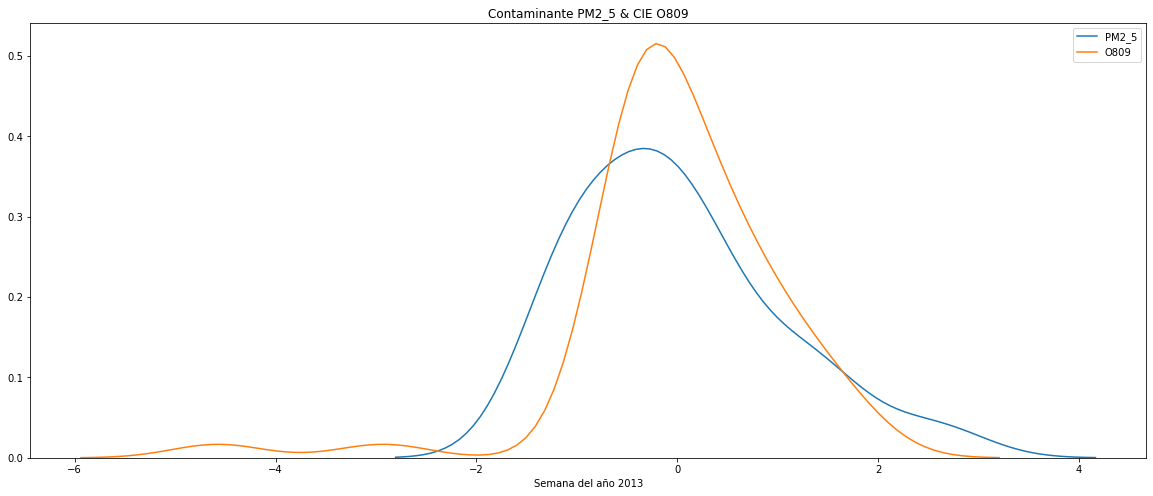


PM2_5 & O800


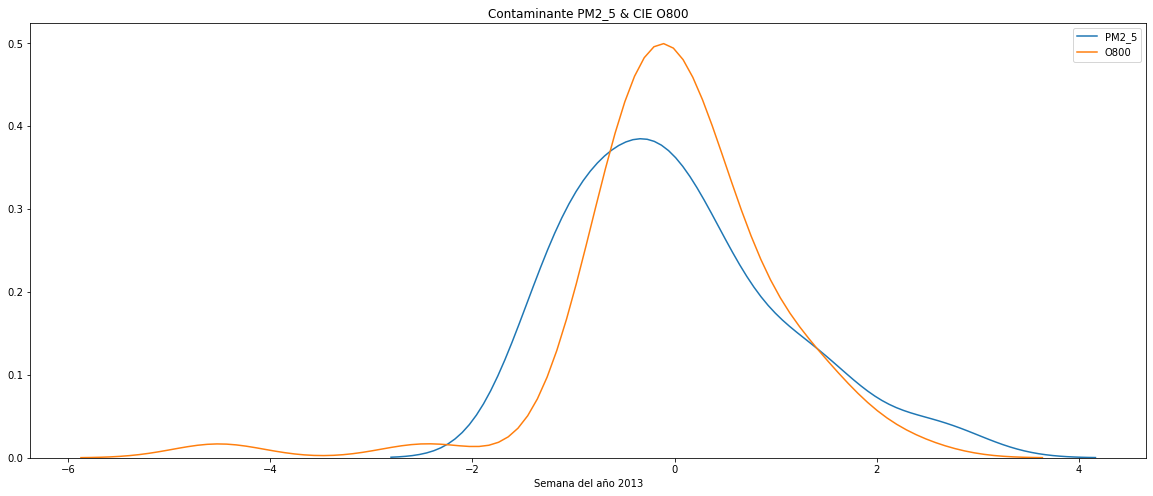


PM2_5 & O829


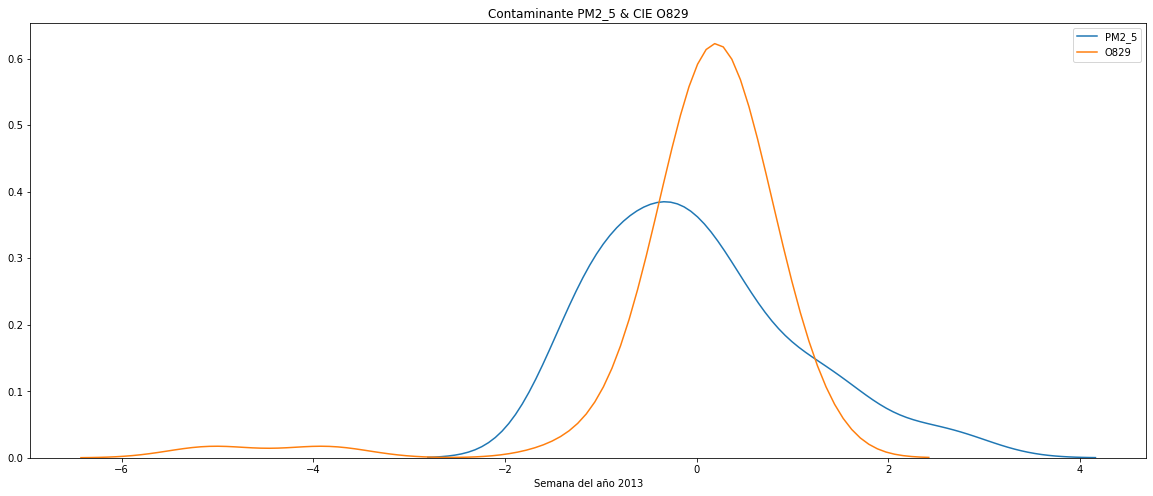


PM2_5 & N189


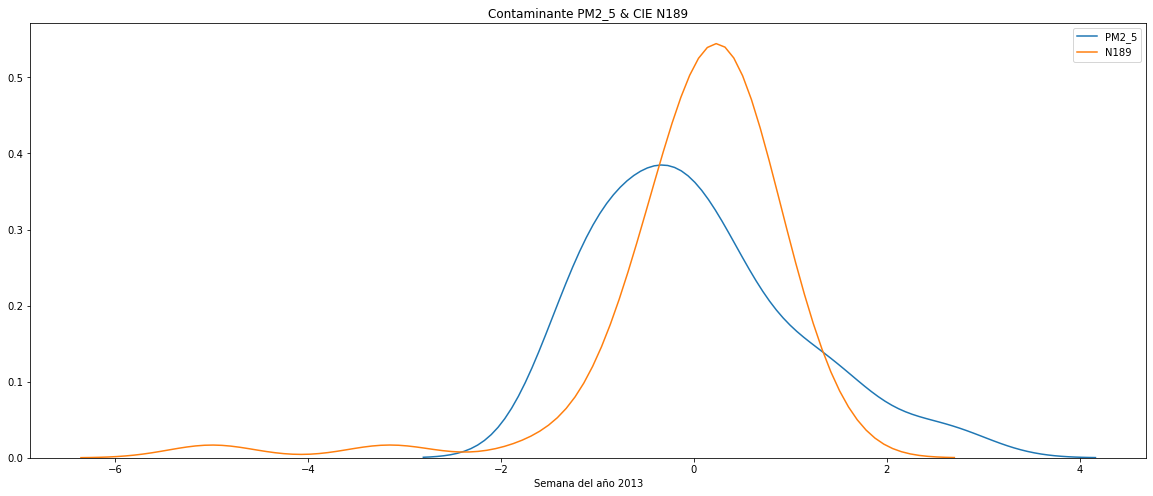


PM2_5 & O064


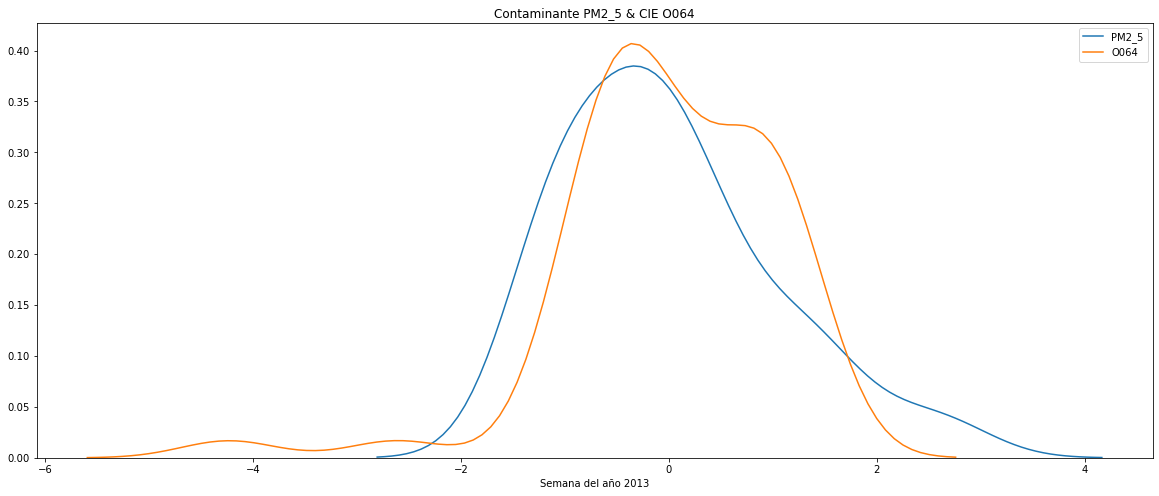


PM2_5 & O342


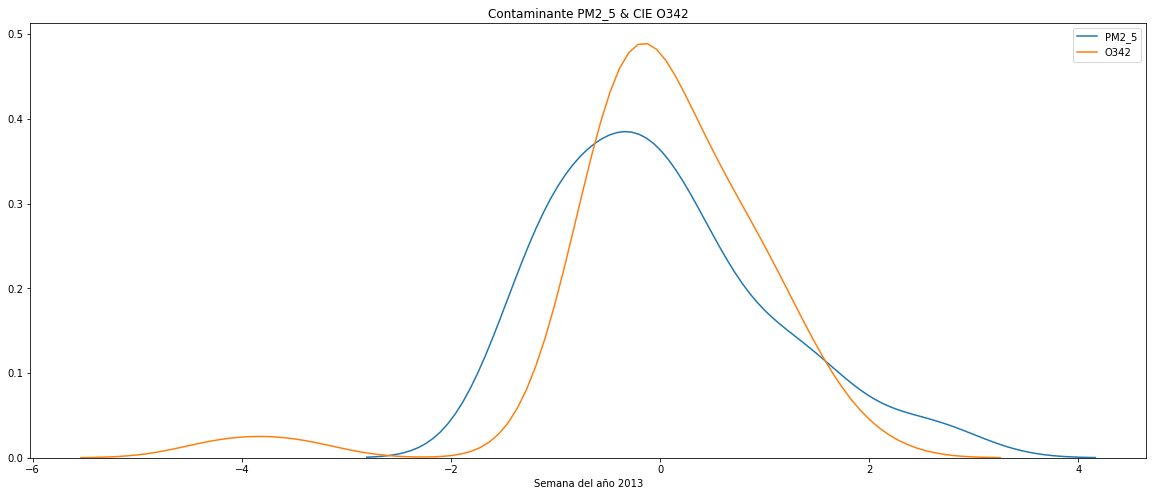


PM2_5 & K359


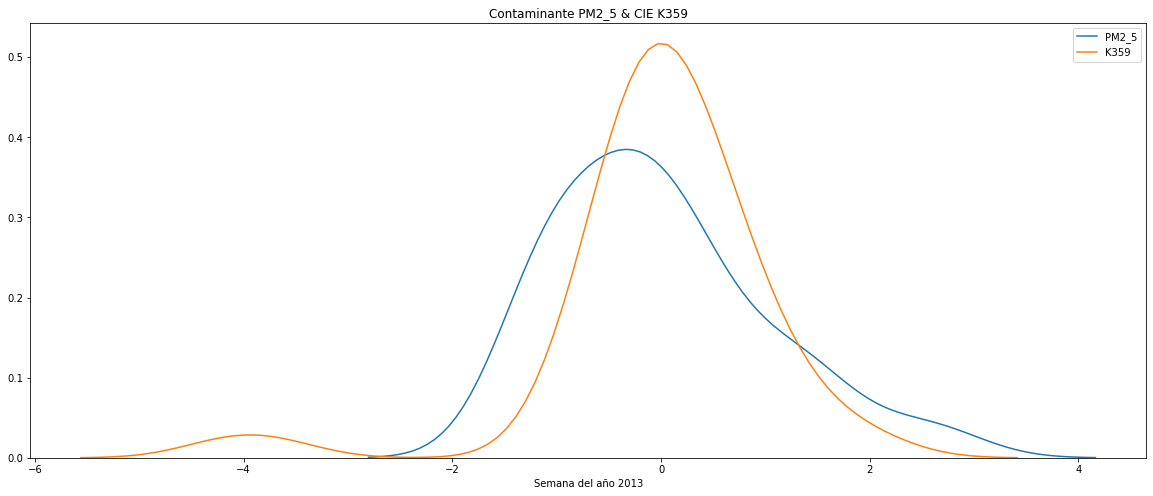


PM2_5 & H


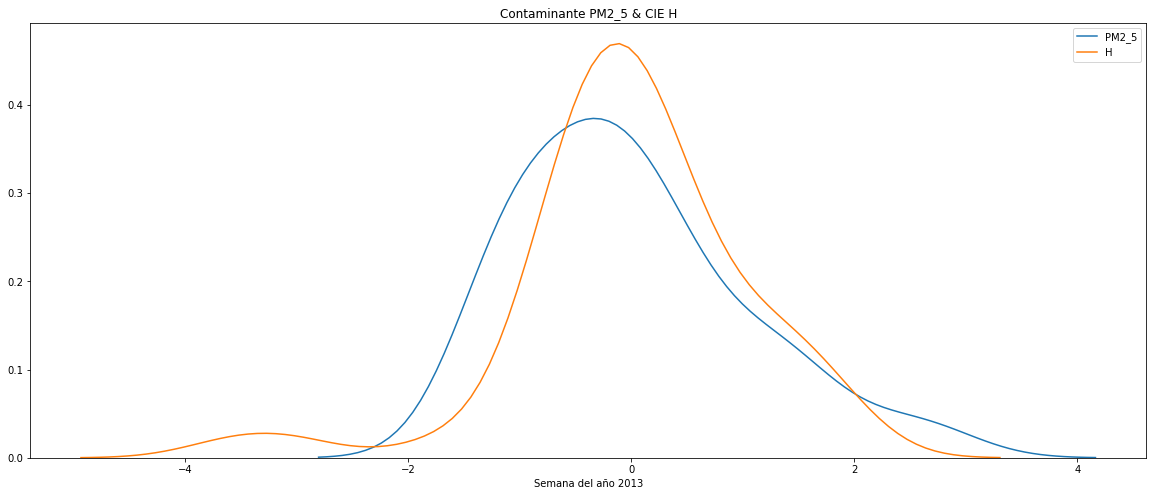


PM2_5 & I


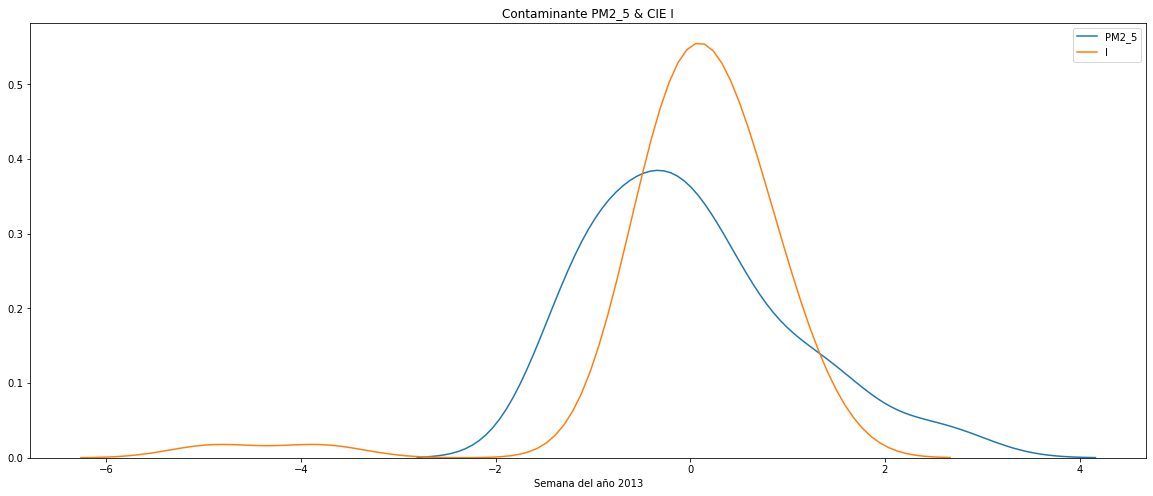


PM2_5 & J


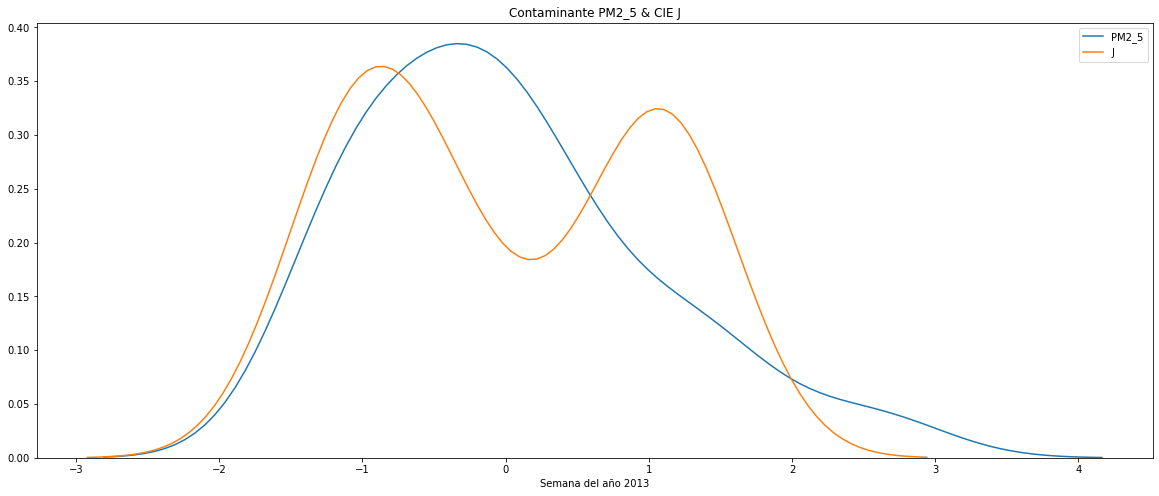

In [34]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2014)

In [35]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2014'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2014-01-01 00  147.0
1      2014-01-01 00  182.0
2      2014-01-01 00  104.0
3      2014-01-01 00  129.0
4      2014-01-01 00   42.0
...              ...    ...
37644  2014-12-31 22   59.0
37645  2014-12-31 22   16.0
37646  2014-12-31 23   48.0
37647  2014-12-31 23   26.0
37648  2014-12-31 23    9.0

[37649 rows x 2 columns]

In [36]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2014-01-01 00:00:00  147.0
1     2014-01-01 00:00:00  182.0
2     2014-01-01 00:00:00  104.0
3     2014-01-01 00:00:00  129.0
4     2014-01-01 00:00:00   42.0
...                   ...    ...
37644 2014-12-31 22:00:00   59.0
37645 2014-12-31 22:00:00   16.0
37646 2014-12-31 23:00:00   48.0
37647 2014-12-31 23:00:00   26.0
37648 2014-12-31 23:00:00    9.0

[37649 rows x 2 columns]

In [37]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2014-01-01 00:00:00  147.0    1
1     2014-01-01 00:00:00  182.0    1
2     2014-01-01 00:00:00  104.0    1
3     2014-01-01 00:00:00  129.0    1
4     2014-01-01 00:00:00   42.0    1
...                   ...    ...  ...
37644 2014-12-31 22:00:00   59.0   53
37645 2014-12-31 22:00:00   16.0   53
37646 2014-12-31 23:00:00   48.0   53
37647 2014-12-31 23:00:00   26.0   53
37648 2014-12-31 23:00:00    9.0   53

[37649 rows x 3 columns]

In [38]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2014-11-20 00:00:00     P220
1        2014-09-17 00:00:00     O829
2        2014-09-10 00:00:00     O809
3        2014-09-05 00:00:00     O689
4        2014-09-04 00:00:00     O809
...                      ...      ...
2959192  2014-10-02 00:00:00     O649
2959193  2014-11-18 00:00:00     O809
2959194  2014-12-19 00:00:00     O470
2959195  2014-01-14 00:00:00     O809
2959196  2014-02-17 00:00:00     I10X

[2959197 rows x 2 columns]

In [39]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2014-11-20     P220   47
1       2014-09-17     O829   38
2       2014-09-10     O809   37
3       2014-09-05     O689   36
4       2014-09-04     O809   36
...            ...      ...  ...
2918661 2014-10-02     O649   40
2918662 2014-11-18     O809   47
2918663 2014-12-19     O470   51
2918664 2014-01-14     O809    3
2918665 2014-02-17     I10X    8

[2918666 rows x 3 columns]

In [40]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     23312
2     51774
3     55426
4     55220
5     57112
6     53354
7     55606
8     56075
9     56113
10    56754
11    57918
12    54352
13    58534
14    57541
15    57472
16    51809
17    53967
18    53470
19    52428
20    56835
21    56361
22    58079
23    58118
24    57917
25    57070
26    57280
27    56855
28    57669
29    58157
30    57816
31    57907
32    57712
33    57097
34    57984
35    60024
36    60197
37    61139
38    56277
39    60859
40    61418
41    61557
42    59699
43    58636
44    59131
45    57958
46    59866
47    54846
48    59227
49    57866
50    57841
51    56454
52    34577
Name: sem, dtype: int64

In [41]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  45.4906
1     2  27.2485
2     3  25.7288
3     4   28.494
4     5  36.9126
5     6  32.3763
6     7  31.6207
7     8  31.3654
8     9  37.8085
9    10  26.5728
10   11  24.3677
11   12  25.1811
12   13  25.0714
13   14  26.8473
14   15  23.8558
15   16  21.8579
16   17  24.1574
17   18  19.6425
18   19  29.1842
19   20  18.9305
20   21  19.5774
21   22  21.1215
22   23  16.2912
23   24  25.3969
24   25  25.1351
25   26  23.1891
26   27   20.321
27   28  22.9464
28   29  22.5246
29   30  24.7239
30   31  23.7503
31   32  22.6225
32   33  19.4604
33   34  25.1039
34   35  19.3807
35   36  18.1672
36   37   18.643
37   38  20.8779
38   39  19.6384
39   40  25.6997
40   41  24.7442
41   42  22.6723
42   43  19.8801
43   44  27.2711
44   45  16.0707
45   46  23.3984
46   47  31.4598
47   48  26.1629
48   49  34.4697
49   50  18.0211
50   51  25.4136
51   52  28.1196


2014

PM2_5 & O809


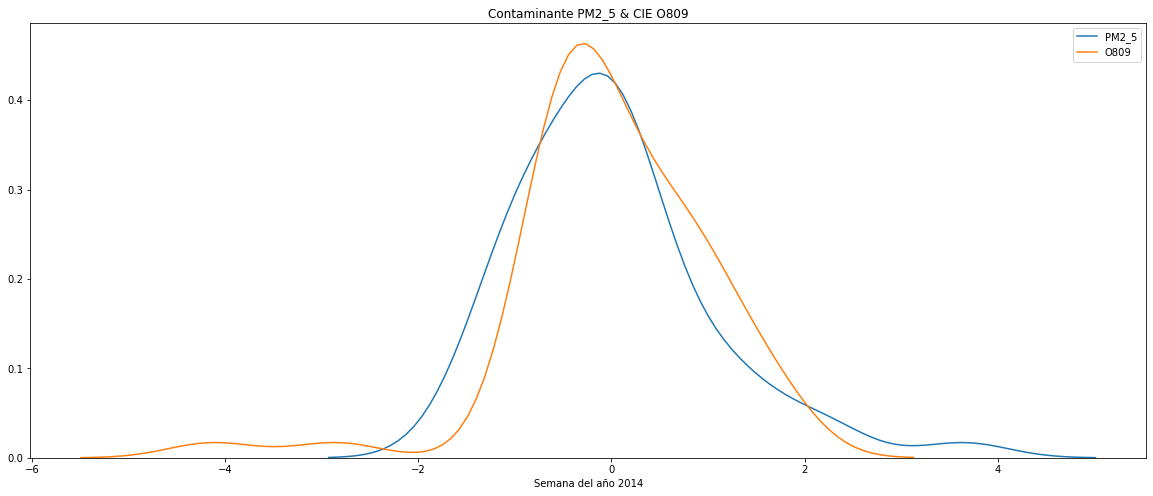


PM2_5 & O800


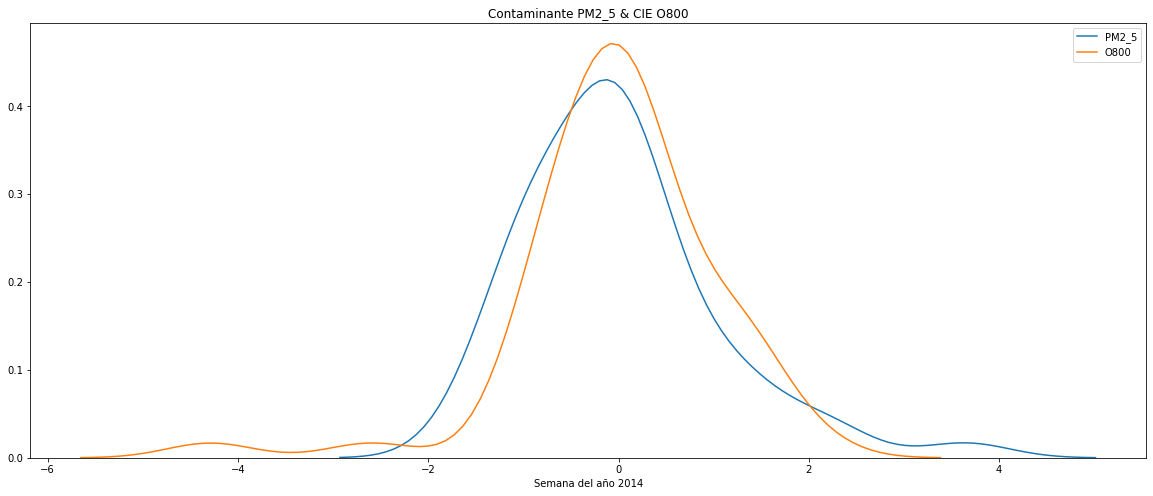


PM2_5 & N189


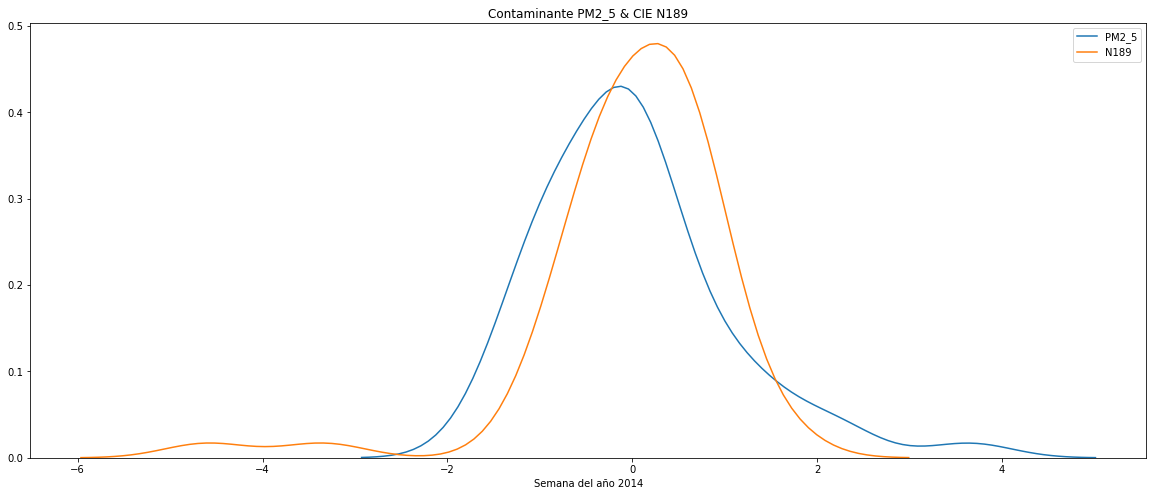


PM2_5 & O829


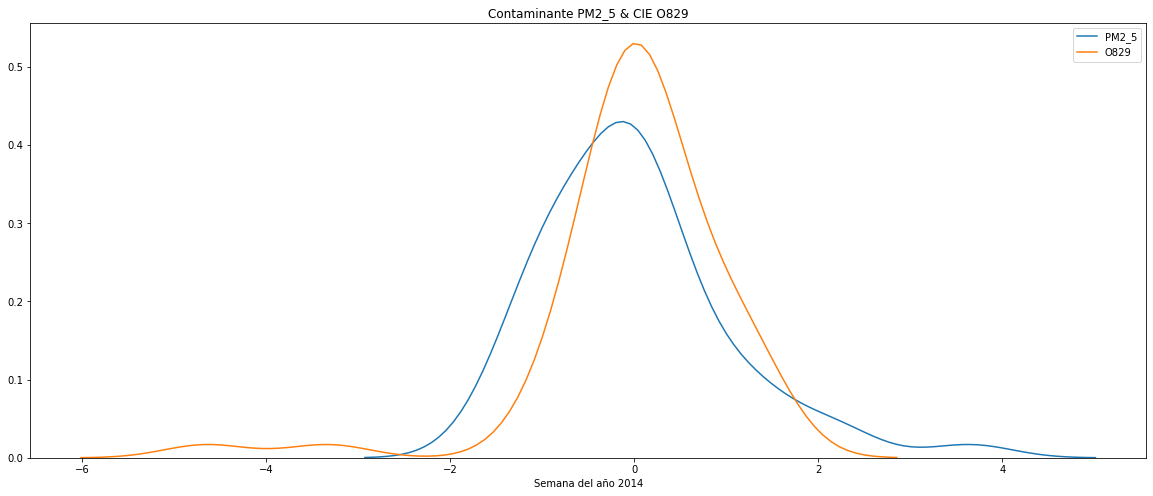


PM2_5 & O064


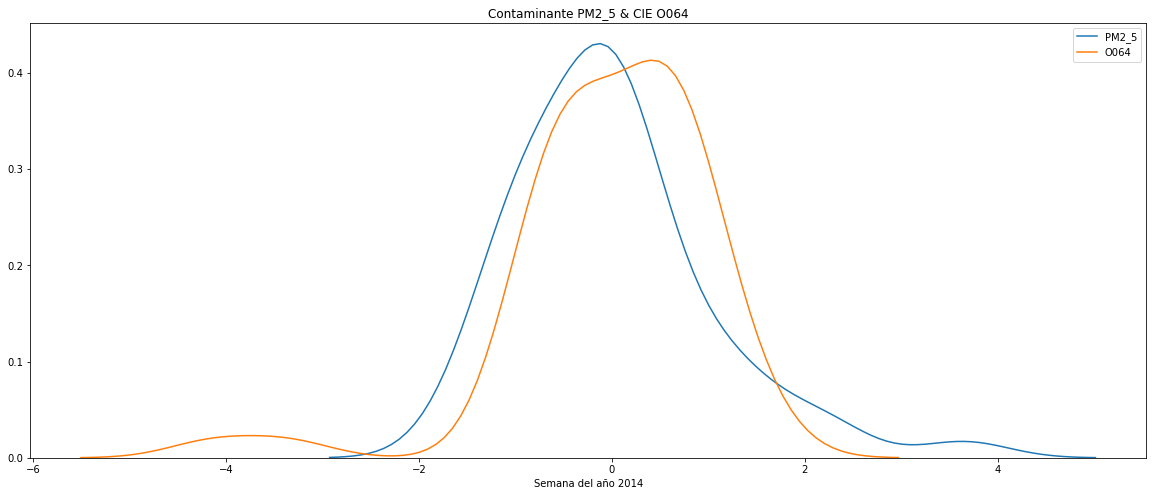


PM2_5 & O342


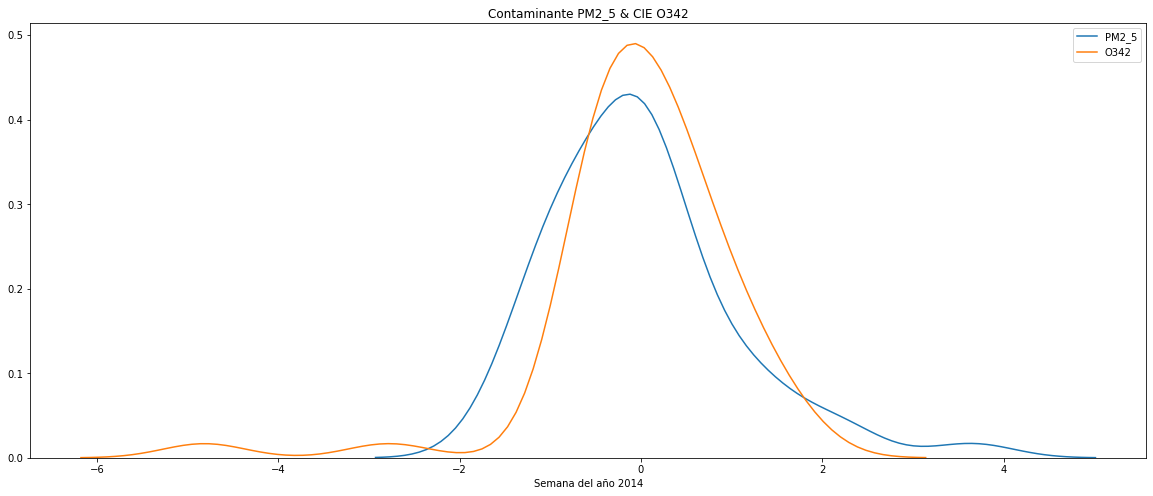


PM2_5 & N185


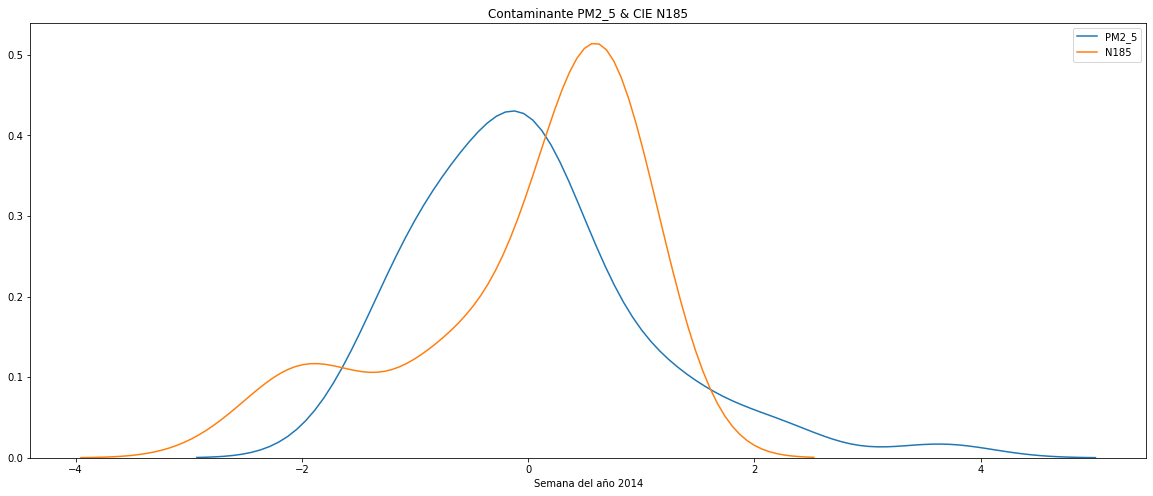


PM2_5 & H


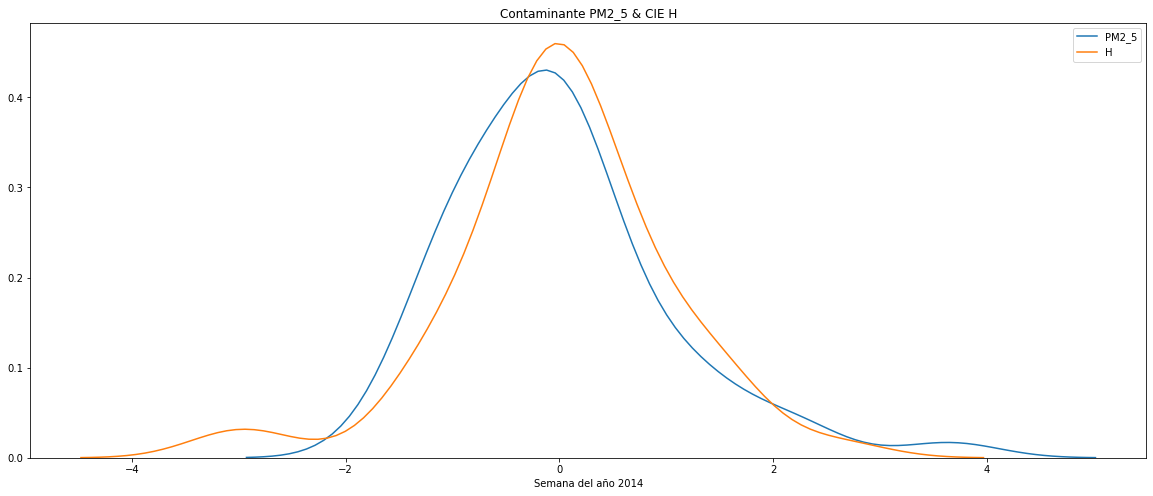


PM2_5 & I


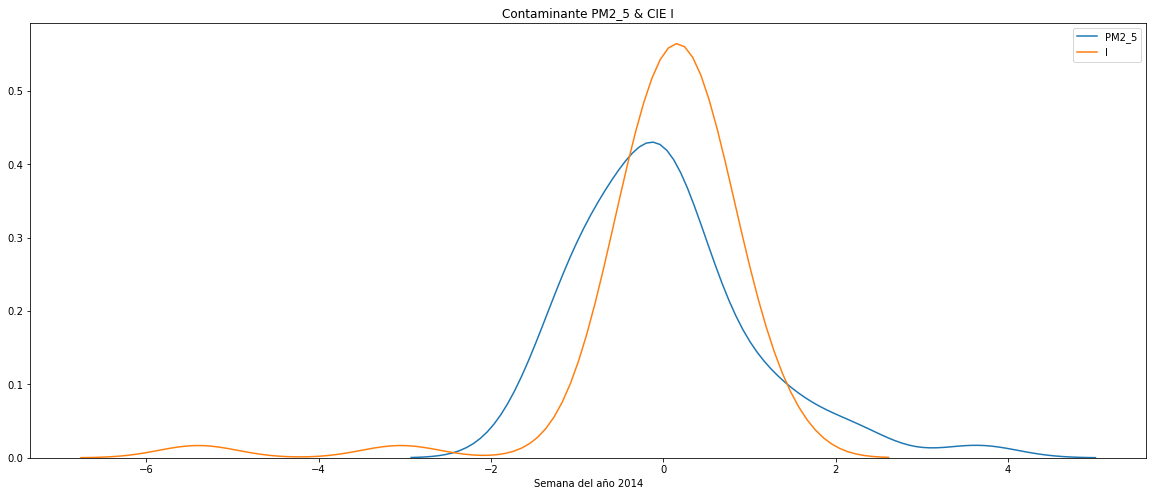


PM2_5 & J


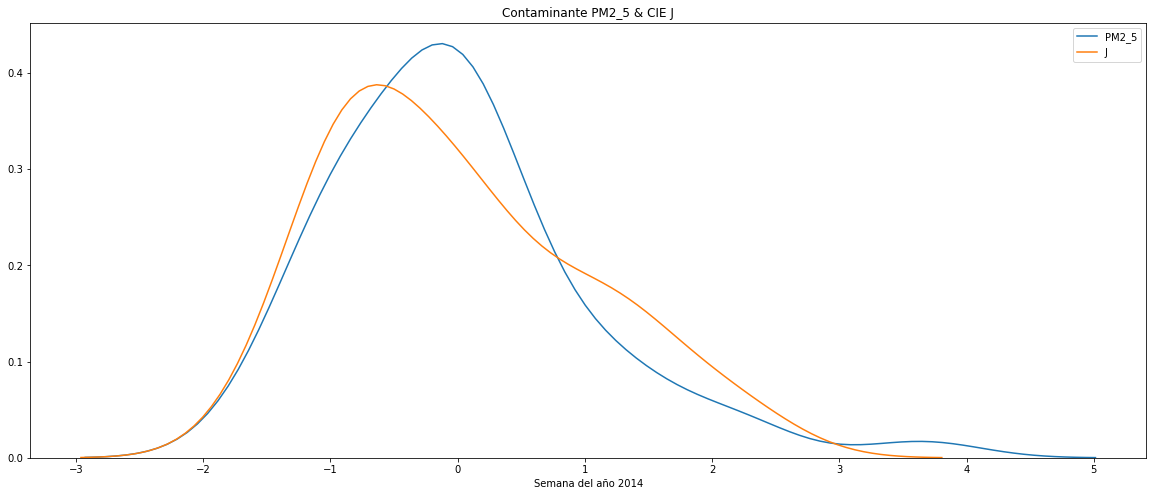

In [42]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2015)

In [43]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2015-01-01 00   17.0
1      2015-01-01 01   80.0
2      2015-01-01 01   27.0
3      2015-01-01 01  169.0
4      2015-01-01 01   15.0
...              ...    ...
38100  2015-12-31 23   46.0
38101  2015-12-31 23   88.0
38102  2015-12-31 23   75.0
38103  2015-12-31 23   39.0
38104  2015-12-31 23   31.0

[38105 rows x 2 columns]

In [44]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2015-01-01 00:00:00   17.0
1     2015-01-01 01:00:00   80.0
2     2015-01-01 01:00:00   27.0
3     2015-01-01 01:00:00  169.0
4     2015-01-01 01:00:00   15.0
...                   ...    ...
38100 2015-12-31 23:00:00   46.0
38101 2015-12-31 23:00:00   88.0
38102 2015-12-31 23:00:00   75.0
38103 2015-12-31 23:00:00   39.0
38104 2015-12-31 23:00:00   31.0

[38105 rows x 2 columns]

In [45]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2015-01-01 00:00:00   17.0   53
1     2015-01-01 01:00:00   80.0   53
2     2015-01-01 01:00:00   27.0   53
3     2015-01-01 01:00:00  169.0   53
4     2015-01-01 01:00:00   15.0   53
...                   ...    ...  ...
38100 2015-12-31 23:00:00   46.0   52
38101 2015-12-31 23:00:00   88.0   52
38102 2015-12-31 23:00:00   75.0   52
38103 2015-12-31 23:00:00   39.0   52
38104 2015-12-31 23:00:00   31.0   52

[38105 rows x 3 columns]

In [46]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=2500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2015-01-03 00:00:00     C910
1        2015-01-03 00:00:00     C845
2        2015-01-03 00:00:00     C189
3        2015-01-03 00:00:00     C509
4        2015-01-03 00:00:00     C220
...                      ...      ...
2499995  2015-02-09 00:00:00     O410
2499996  2015-03-12 00:00:00     K811
2499997  2015-04-08 00:00:00     O809
2499998  2015-05-10 00:00:00     O054
2499999  2015-06-10 00:00:00     P240

[2500000 rows x 2 columns]

In [47]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2015-01-03     C910   53
1       2015-01-03     C845   53
2       2015-01-03     C189   53
3       2015-01-03     C509   53
4       2015-01-03     C220   53
...            ...      ...  ...
2463488 2015-02-09     O410    6
2463489 2015-03-12     K811   10
2463490 2015-04-08     O809   14
2463491 2015-05-10     O054   19
2463492 2015-06-10     P240   23

[2463493 rows x 3 columns]

In [48]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     44314
2     47507
3     48330
4     49381
5     46542
6     49035
7     48313
8     49213
9     48990
10    49905
11    46079
12    49712
13    44580
14    46364
15    47680
16    48058
17    47197
18    44426
19    47733
20    48187
21    48794
22    48484
23    48844
24    47430
25    46821
26    48245
27    49058
28    48403
29    48423
30    49374
31    49081
32    49114
33    49120
34    49473
35    49948
36    50555
37    46763
38    50028
39    50709
40    51615
41    49976
42    48570
43    49416
44    46316
45    49821
46    45952
47    49110
48    49021
49    47650
50    46348
51    35336
53    14149
Name: sem, dtype: int64

In [49]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  23.5816
1     2  28.4596
2     3  26.0911
3     4  24.5006
4     5   27.314
5     6  27.2028
6     7  30.4061
7     8  23.8692
8     9  26.3251
9    10  29.4232
10   11  31.8053
11   12  28.2298
12   13  33.3464
13   14  31.0614
14   15  29.3493
15   16  31.6234
16   17  20.4994
17   18  30.3438
18   19  29.8319
19   20  30.1744
20   21  28.6945
21   22  19.5393
22   23  22.2403
23   24  23.1908
24   25  29.4856
25   26   25.826
26   27  27.8829
27   28   29.796
28   29  27.8333
29   30  27.7001
30   31  27.7791
31   32  22.6423
32   33  24.9278
33   34   22.355
34   35  24.6195
35   36  27.6889
36   37  19.6581
37   38  17.4107
38   39  23.2523
39   40  20.2577
40   41  22.2256
41   42  21.3884
42   43  24.1043
43   44  25.9123
44   45  20.7598
45   46  26.9108
46   47  19.3243
47   48  27.8262
48   49  34.8709
49   50   25.073
50   51  41.9857
51   53  23.7274


2015

PM2_5 & O809


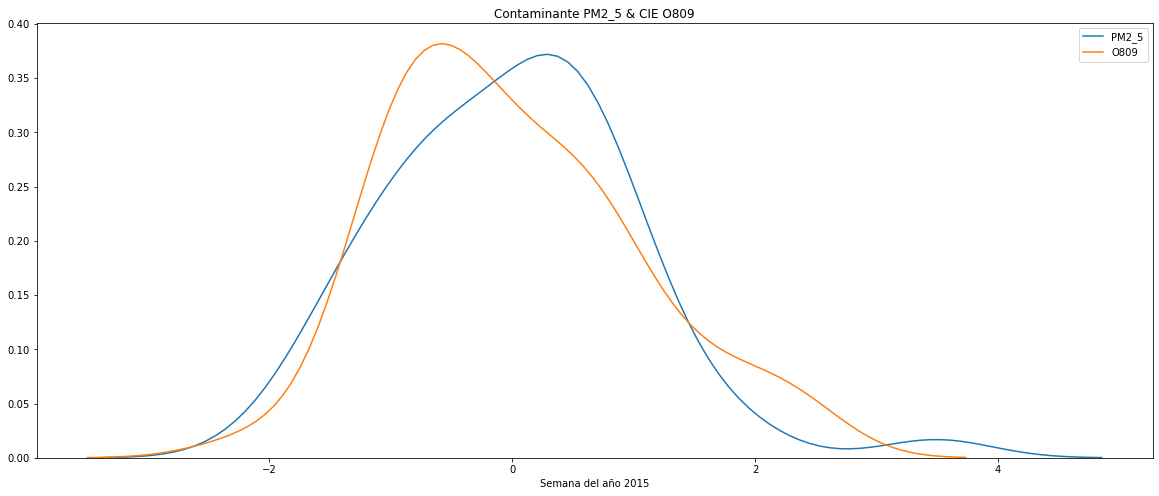


PM2_5 & N189


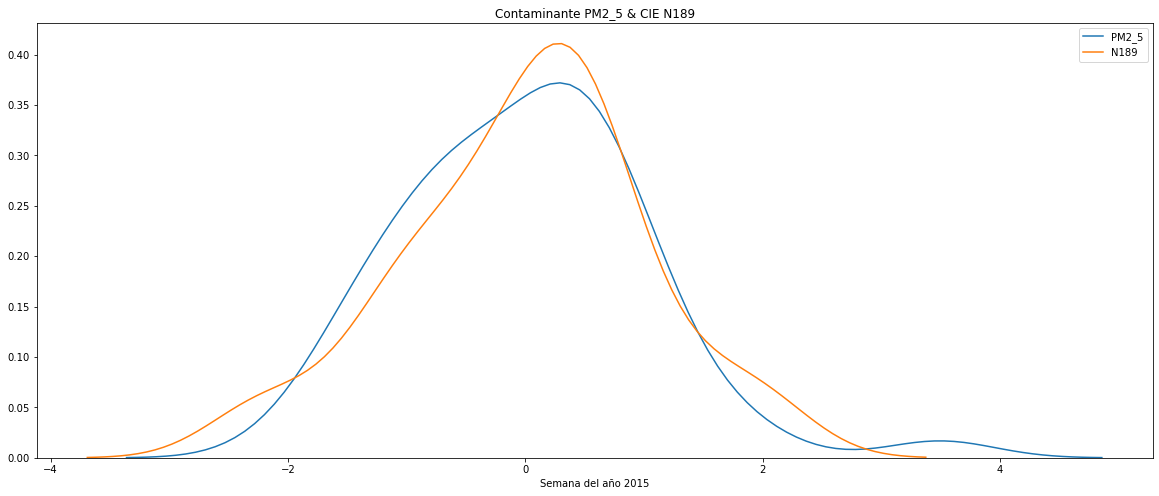


PM2_5 & O800


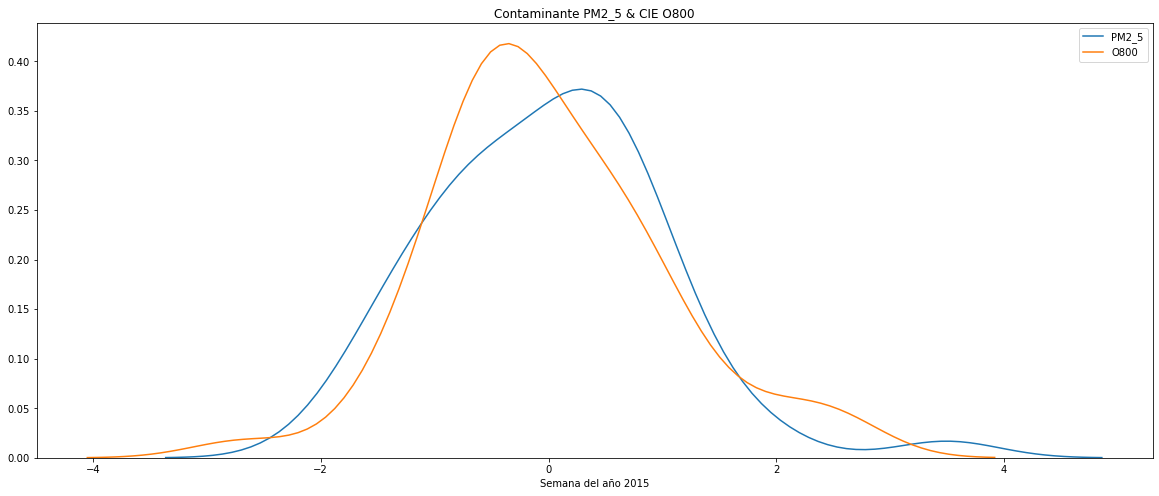


PM2_5 & O829


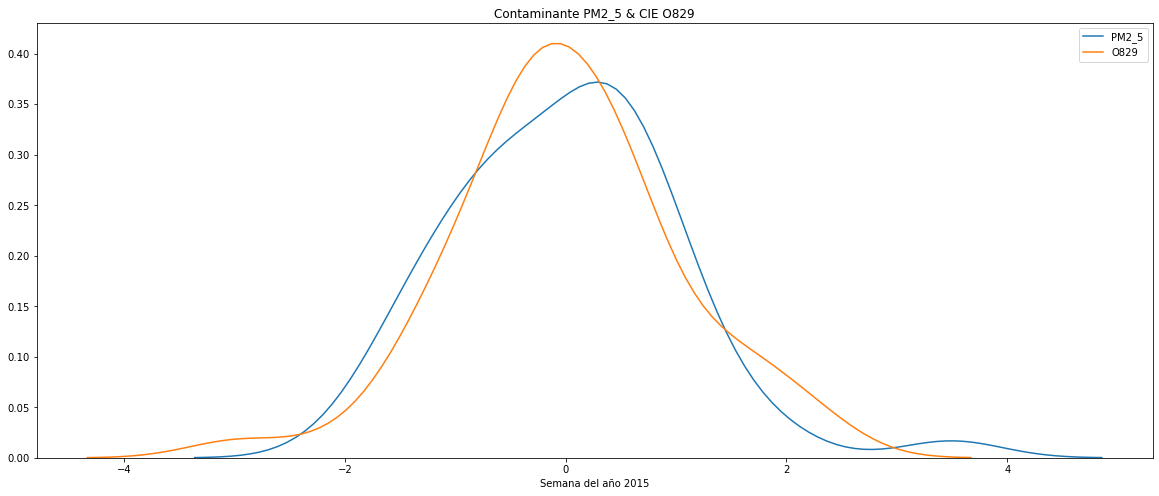


PM2_5 & O064


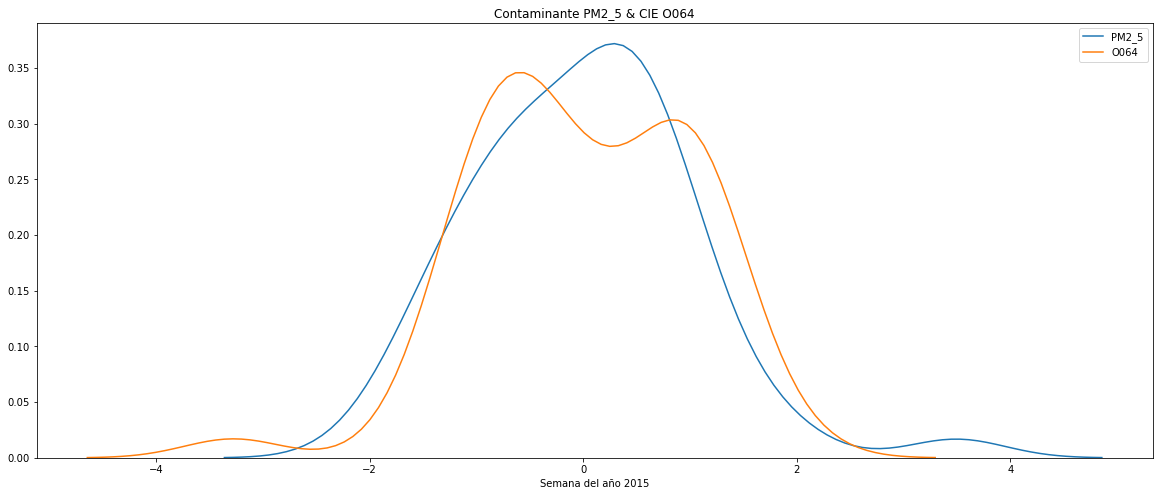


PM2_5 & O342


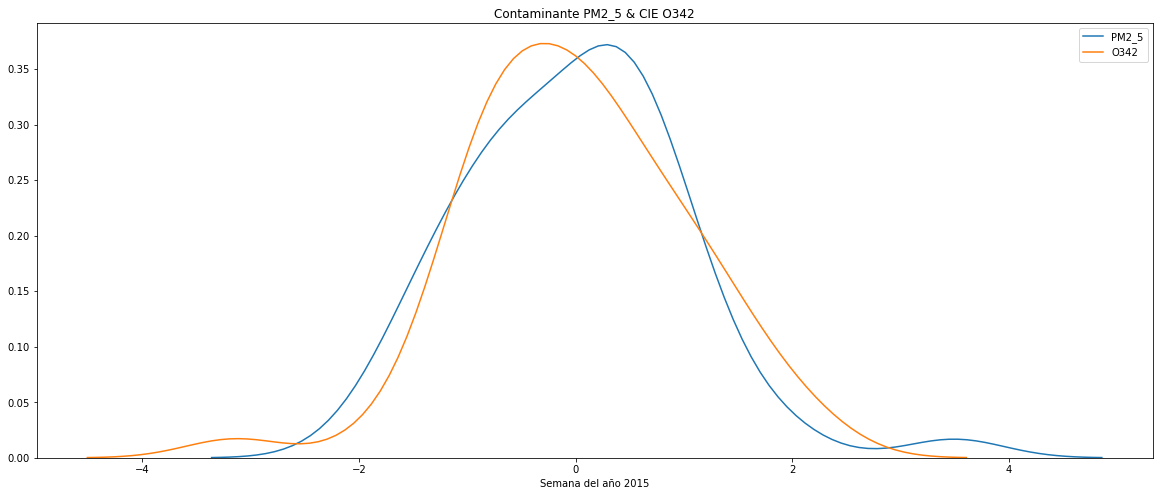


PM2_5 & K358


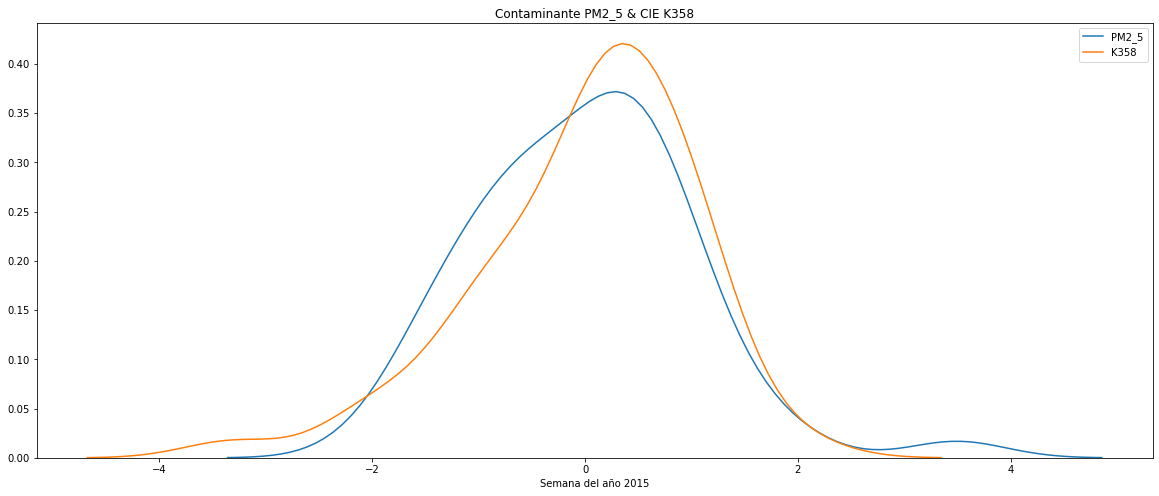


PM2_5 & H


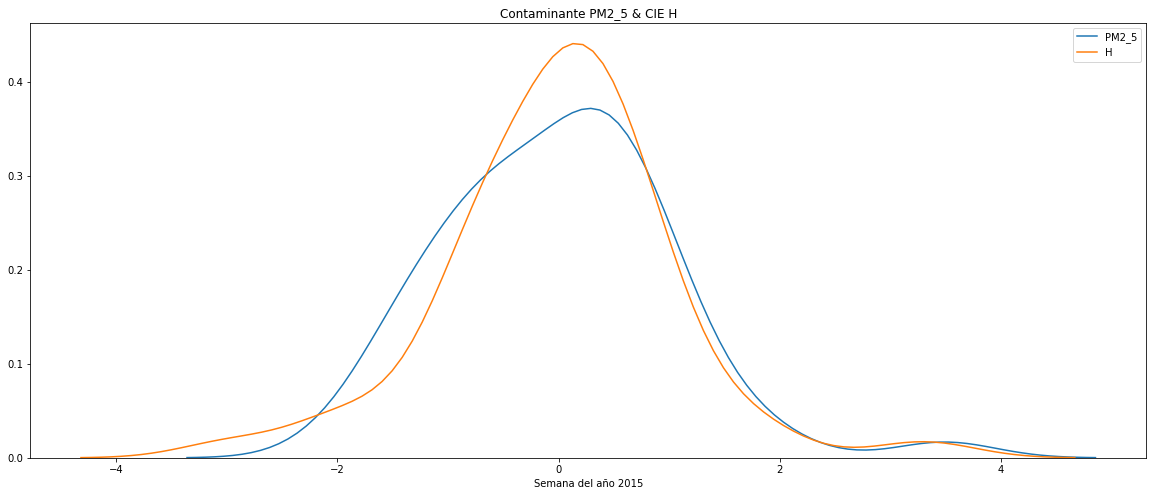


PM2_5 & I


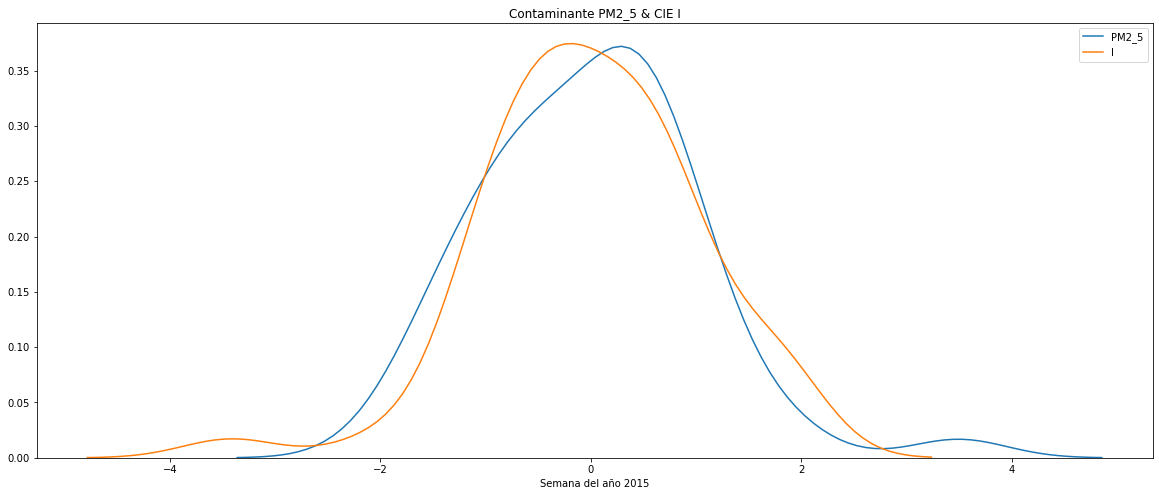


PM2_5 & J


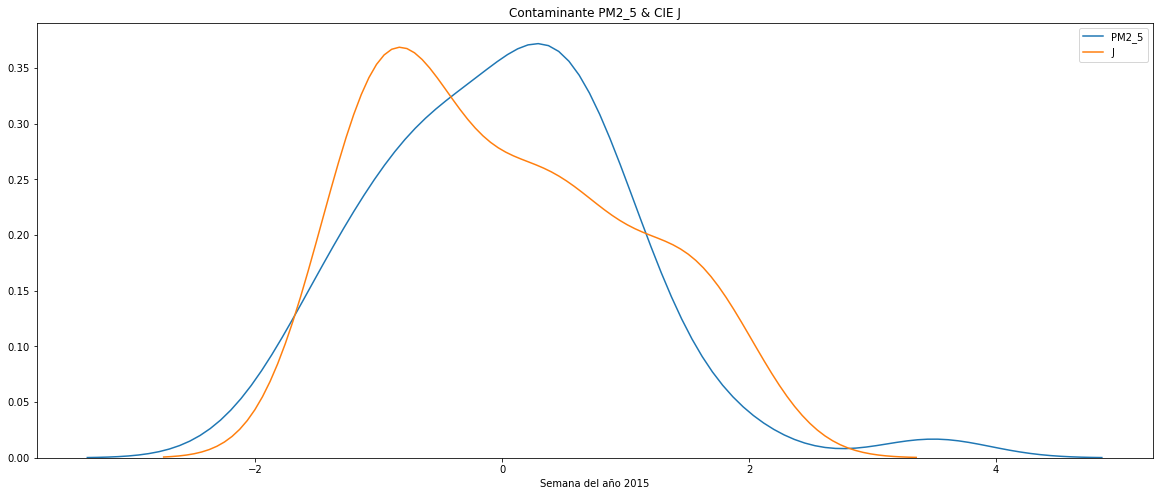

In [50]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2016)

In [51]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2016-01-01 00   36.0
1      2016-01-01 00   80.0
2      2016-01-01 01  161.0
3      2016-01-01 01  215.0
4      2016-01-01 01   70.0
...              ...    ...
24192  2016-12-31 19   71.0
24193  2016-12-31 20   96.0
24194  2016-12-31 21  122.0
24195  2016-12-31 22  133.0
24196  2016-12-31 23  108.0

[24197 rows x 2 columns]

In [52]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2016-01-01 00:00:00   36.0
1     2016-01-01 00:00:00   80.0
2     2016-01-01 01:00:00  161.0
3     2016-01-01 01:00:00  215.0
4     2016-01-01 01:00:00   70.0
...                   ...    ...
24192 2016-12-31 19:00:00   71.0
24193 2016-12-31 20:00:00   96.0
24194 2016-12-31 21:00:00  122.0
24195 2016-12-31 22:00:00  133.0
24196 2016-12-31 23:00:00  108.0

[24197 rows x 2 columns]

In [53]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2016-01-01 00:00:00   36.0   52
1     2016-01-01 00:00:00   80.0   52
2     2016-01-01 01:00:00  161.0   52
3     2016-01-01 01:00:00  215.0   52
4     2016-01-01 01:00:00   70.0   52
...                   ...    ...  ...
24192 2016-12-31 19:00:00   71.0   52
24193 2016-12-31 20:00:00   96.0   52
24194 2016-12-31 21:00:00  122.0   52
24195 2016-12-31 22:00:00  133.0   52
24196 2016-12-31 23:00:00  108.0   52

[24197 rows x 3 columns]

In [54]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        12/30/2015 00:00     N185
1        12/31/2015 00:00     N185
2        12/31/2015 00:00     N185
3        01/02/2016 00:00     N185
4        01/02/2016 00:00     N185
...                   ...      ...
1048570  08/24/2016 00:00     E115
1048571  08/17/2016 00:00     O809
1048572  08/21/2016 00:00     O809
1048573  08/22/2016 00:00     O809
1048574  08/19/2016 00:00     O809

[1048574 rows x 2 columns]

In [55]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2016-01-02     N185   52
1       2016-01-02     N185   52
2       2016-01-02     N185   52
3       2016-01-02     N185   52
4       2016-01-02     N185   52
...            ...      ...  ...
1032801 2016-08-24     E115   34
1032802 2016-08-17     O809   33
1032803 2016-08-21     O809   34
1032804 2016-08-22     O809   34
1032805 2016-08-19     O809   33

[1032806 rows x 3 columns]

In [56]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17589
2     19491
3     19832
4     20191
5     19086
6     20157
7     19888
8     20511
9     20626
10    20529
11    20988
12    17365
13    19319
14    20001
15    20455
16    19735
17    20120
18    19200
19    19319
20    19965
21    20731
22    19958
23    20423
24    20138
25    19626
26    19910
27    20014
28    20014
29    20375
30    20131
31    20075
32    20357
33    20336
34    20555
35    20810
36    21251
37    20265
38    21211
39    21159
40    20842
41    20627
42    20497
43    20288
44    18737
45    19961
46    19748
47    18405
48    19142
49    18985
50    18585
51    18338
52    16945
Name: sem, dtype: int64

In [57]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  23.7074
1     2  25.4198
2     3  22.8097
3     4  22.6968
4     5  18.9825
5     6  19.9666
6     7  25.7195
7     8   19.513
8     9  23.5301
9    10  21.2439
10   11  28.0862
11   12  16.0988
12   13  23.4917
13   14  17.8196
14   15  23.7613
15   16  22.5588
16   17  33.1421
17   18  20.1727
18   19  28.5273
19   20  23.3799
20   21  35.9454
21   22  26.9571
22   23  23.3055
23   24  33.7927
24   25  23.5443
25   26  24.7961
26   27  29.7106
27   28  29.1931
28   29  17.9465
29   30  25.8438
30   31   23.186
31   32  28.3295
32   33  26.8029
33   34  23.9268
34   35  23.6483
35   36  28.2781
36   37  23.9128
37   38  23.3006
38   39  27.1981
39   40  30.5615
40   41  25.9244
41   42   30.444
42   43   22.956
43   44   23.498
44   45  24.7706
45   46  31.1818
46   47  23.4305
47   48  23.1942
48   49  23.1565
49   50  32.7115
50   51  33.6225
51   52  26.3857


2016

PM2_5 & O809


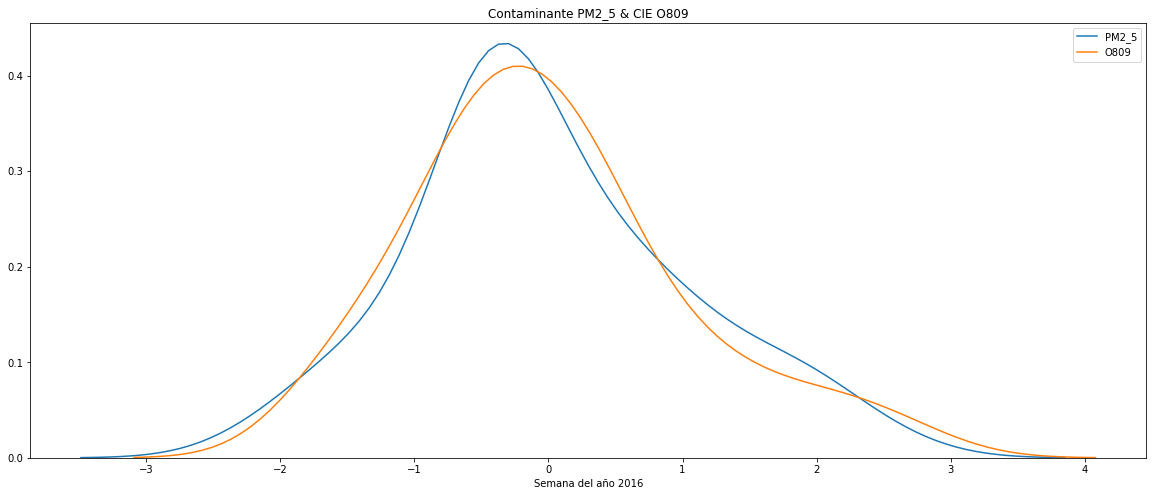


PM2_5 & O800


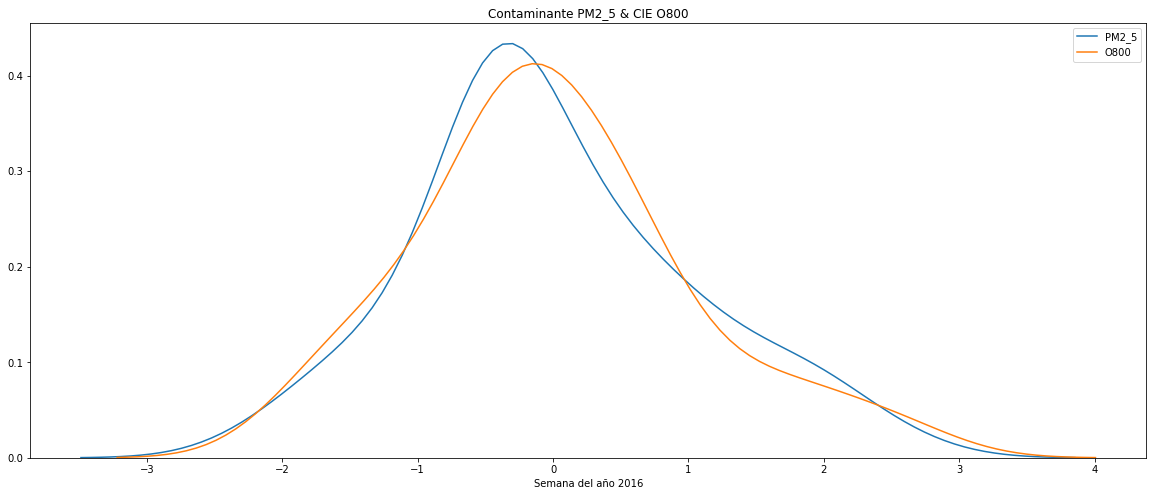


PM2_5 & O829


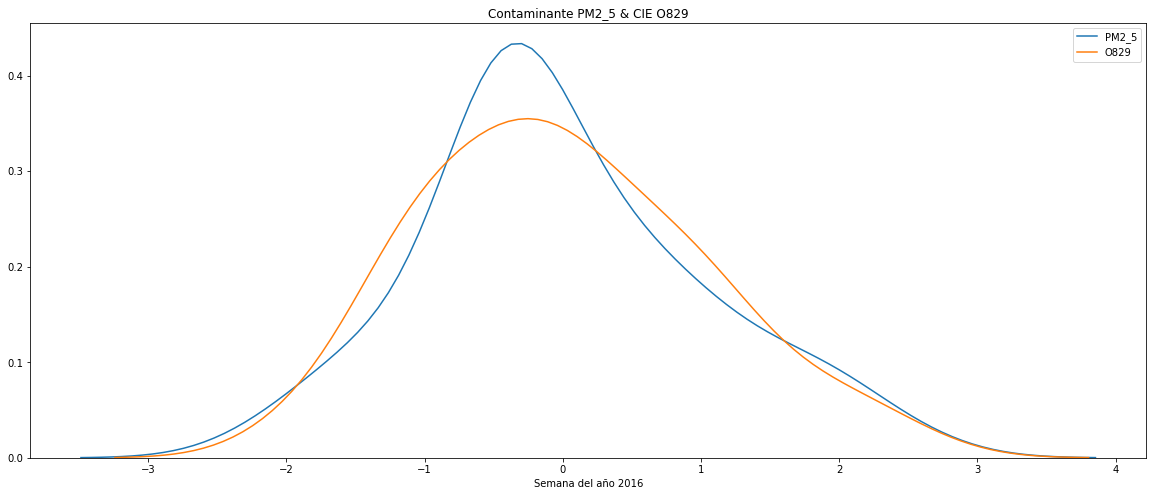


PM2_5 & O064


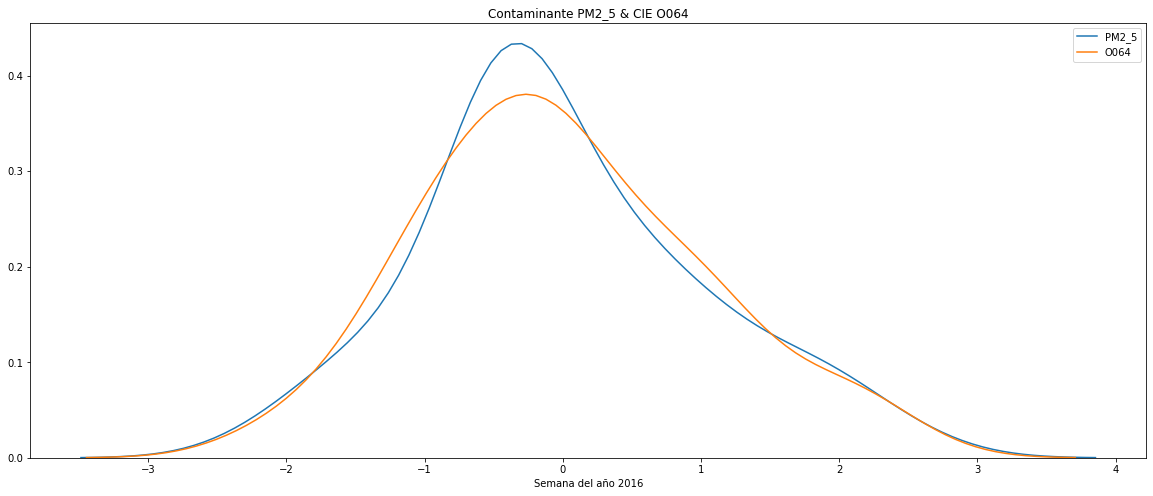


PM2_5 & N189


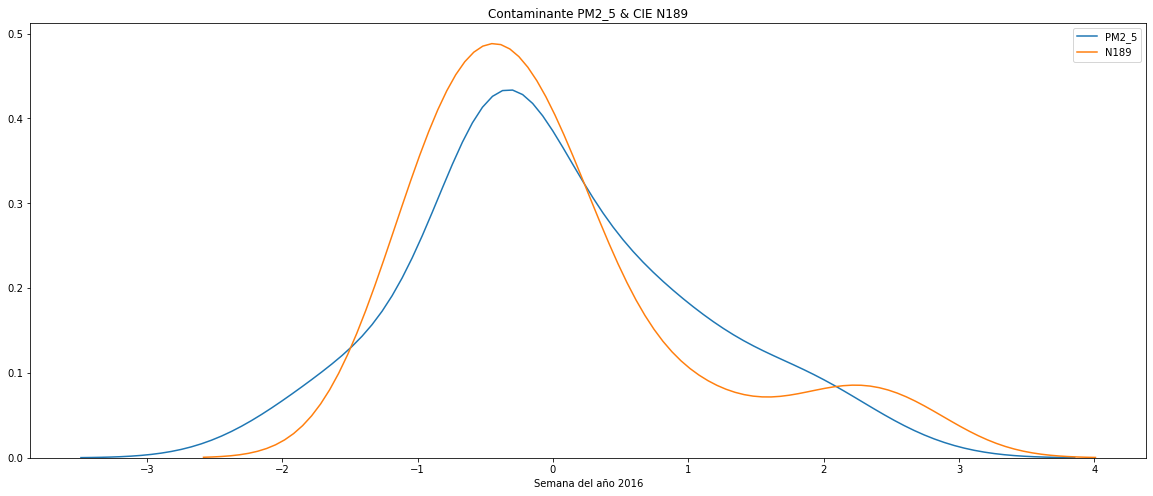


PM2_5 & O342


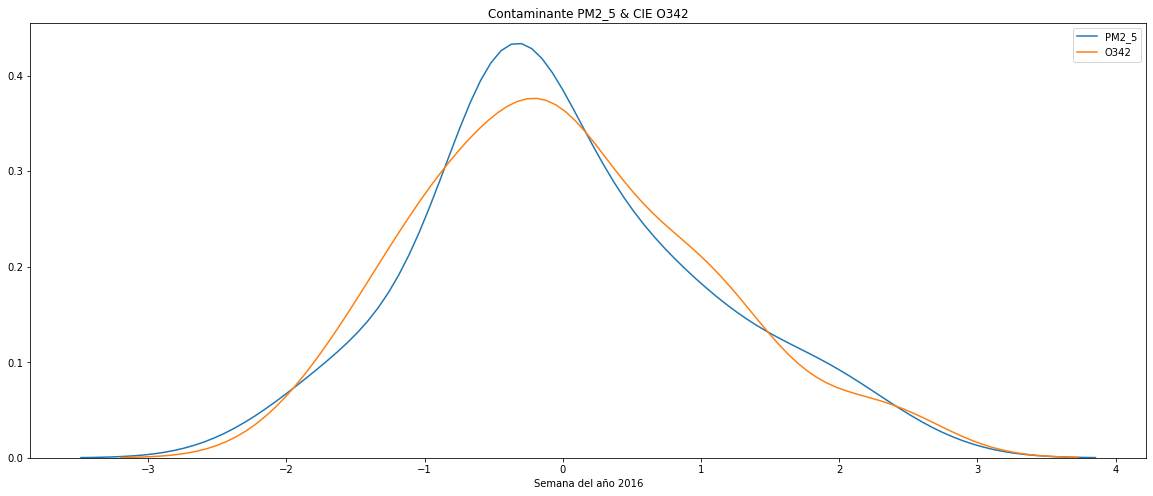


PM2_5 & K358


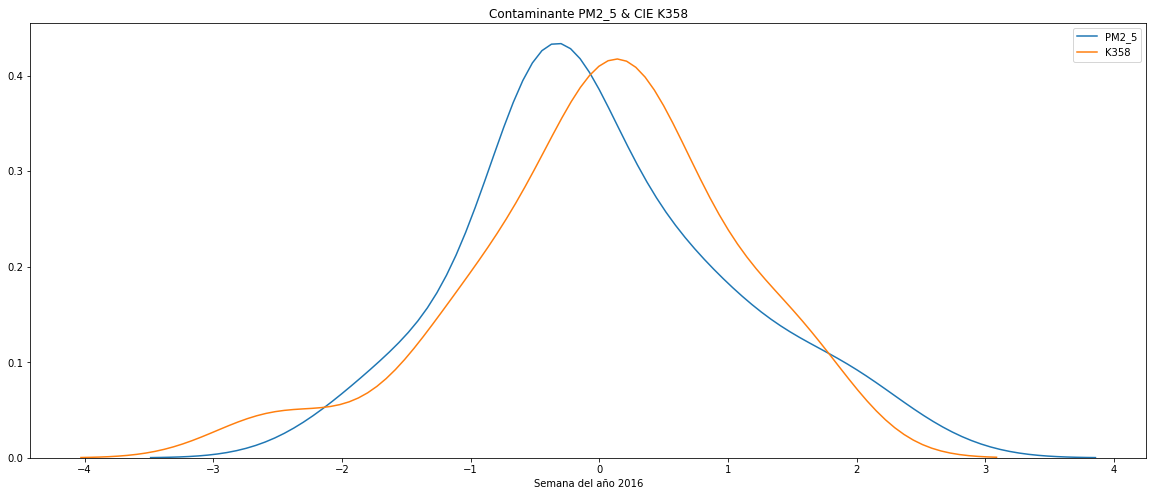


PM2_5 & H


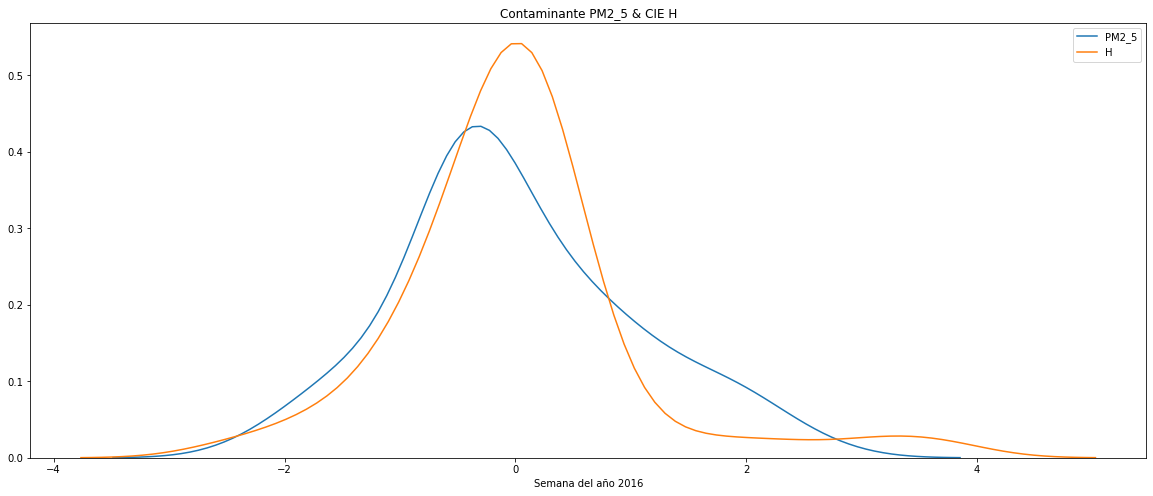


PM2_5 & I


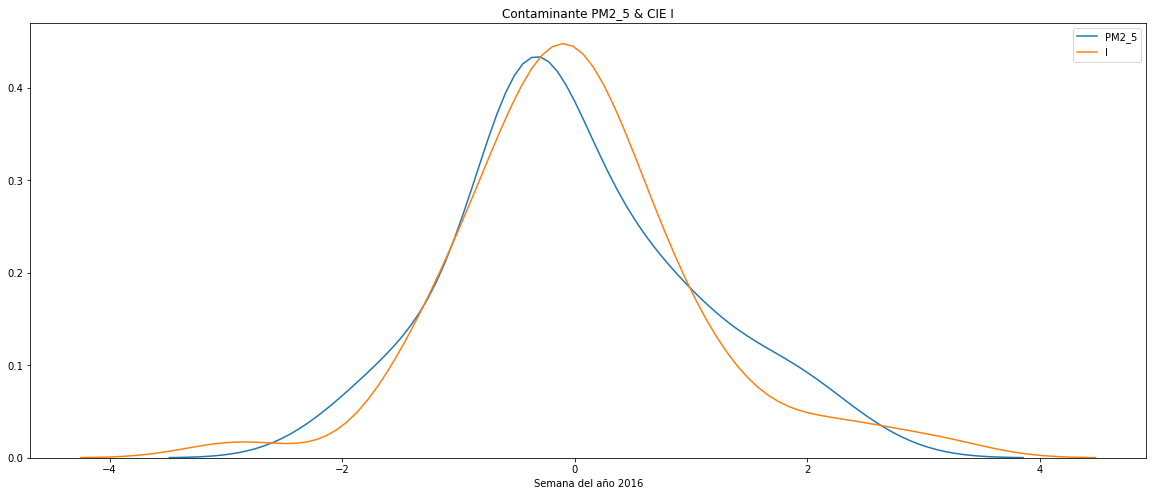


PM2_5 & J


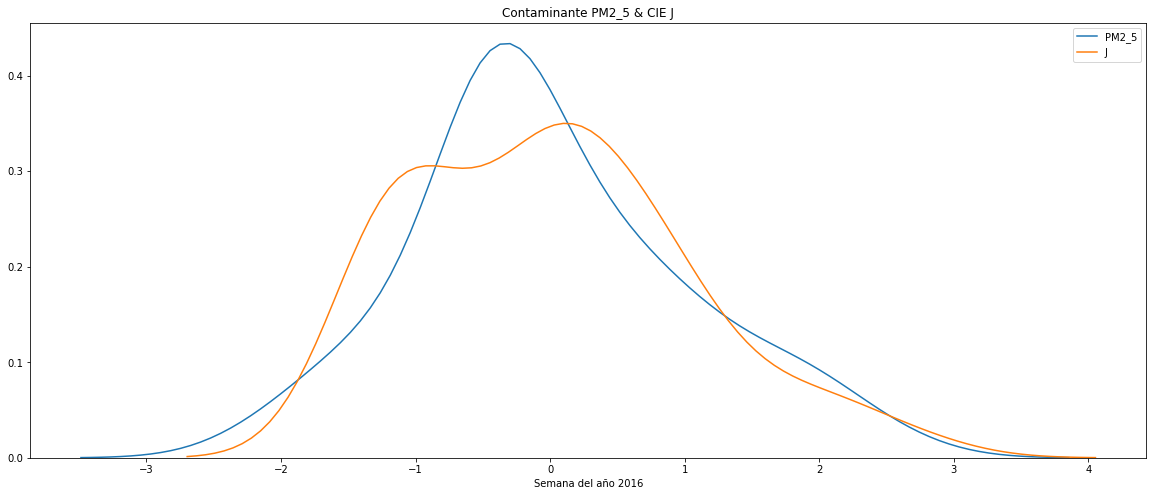

In [58]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2017)

In [59]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp  PM2_5
0      2017-01-01 01  349.0
1      2017-01-01 02  187.0
2      2017-01-01 03  101.0
3      2017-01-01 04   81.0
4      2017-01-01 05   47.0
...              ...    ...
25200  2017-12-31 22   12.0
25201  2017-12-31 22   12.0
25202  2017-12-31 22   23.0
25203  2017-12-31 23   22.0
25204  2017-12-31 23   16.0

[25205 rows x 2 columns]

In [60]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp  PM2_5
0     2017-01-01 01:00:00  349.0
1     2017-01-01 02:00:00  187.0
2     2017-01-01 03:00:00  101.0
3     2017-01-01 04:00:00   81.0
4     2017-01-01 05:00:00   47.0
...                   ...    ...
25200 2017-12-31 22:00:00   12.0
25201 2017-12-31 22:00:00   12.0
25202 2017-12-31 22:00:00   23.0
25203 2017-12-31 23:00:00   22.0
25204 2017-12-31 23:00:00   16.0

[25205 rows x 2 columns]

In [61]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp  PM2_5  sem
0     2017-01-01 01:00:00  349.0    1
1     2017-01-01 02:00:00  187.0    1
2     2017-01-01 03:00:00  101.0    1
3     2017-01-01 04:00:00   81.0    1
4     2017-01-01 05:00:00   47.0    1
...                   ...    ...  ...
25200 2017-12-31 22:00:00   12.0    1
25201 2017-12-31 22:00:00   12.0    1
25202 2017-12-31 22:00:00   23.0    1
25203 2017-12-31 23:00:00   22.0    1
25204 2017-12-31 23:00:00   16.0    1

[25205 rows x 3 columns]

In [62]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums, nrows=1500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2017-02-13 00:00:00     O809
1        2017-03-12 00:00:00     O809
2        2017-04-12 00:00:00     E86X
3        2017-05-13 00:00:00     O809
4        2017-06-14 00:00:00     I219
...                      ...      ...
1499995  2017-08-04 00:00:00     O809
1499996  2017-08-04 00:00:00     O809
1499997  2017-08-04 00:00:00     O064
1499998  2017-08-04 00:00:00     O064
1499999  2017-08-04 00:00:00     O064

[1500000 rows x 2 columns]

In [63]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2017-02-13     O809    7
1       2017-03-12     O809   11
2       2017-04-12     E86X   15
3       2017-05-13     O809   19
4       2017-06-14     I219   24
...            ...      ...  ...
1499995 2017-08-04     O809   31
1499996 2017-08-04     O809   31
1499997 2017-08-04     O064   31
1499998 2017-08-04     O064   31
1499999 2017-08-04     O064   31

[1500000 rows x 3 columns]

In [64]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     29887
2     30924
3     32383
4     32156
5     32001
6     30230
7     32552
8     31518
9     31718
10    32476
11    31829
12    29294
13    29940
14    28557
15    26151
16    26885
17    27700
18    24600
19    26186
20    27410
21    27306
22    26797
23    27708
24    28105
25    27789
26    27284
27    27648
28    27696
29    27579
30    26725
31    27417
32    28836
33    28370
34    28507
35    29005
36    29782
37    30581
38    30630
39    29696
40    30454
41    30531
42    30724
43    30116
44    28700
45    30153
46    30218
47    26720
48    28416
49    28652
50    27196
51    25701
52    20561
Name: sem, dtype: int64

In [65]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  28.3333
1     2  32.0989
2     3  24.2792
3     4  18.5407
4     5  24.6062
5     6  25.5851
6     7   17.511
7     8  16.5327
8     9  21.7162
9    10  19.7045
10   11  21.1443
11   12  22.0179
12   13   23.686
13   14  15.0147
14   15  17.5515
15   16    20.43
16   17  19.7455
17   18  18.0499
18   19   22.477
19   20  29.9055
20   21  23.6667
21   22  19.2344
22   23  15.1315
23   24   17.725
24   25  18.3852
25   26  18.7027
26   27  14.8838
27   28  13.2877
28   29    17.19
29   30  17.9625
30   31  17.7335
31   32  16.3742
32   33  20.1782
33   34  13.1594
34   35  13.8494
35   36  15.3562
36   37  19.2122
37   38  14.4491
38   39  13.6013
39   40  15.8929
40   41  17.1266
41   42  19.4709
42   43  17.3325
43   44  28.2208
44   45  24.8031
45   46   24.215
46   47  18.4917
47   48  20.6562
48   49  20.9325
49   50  28.7065
50   51  46.9191
51   52  33.1155


2017

PM2_5 & O809


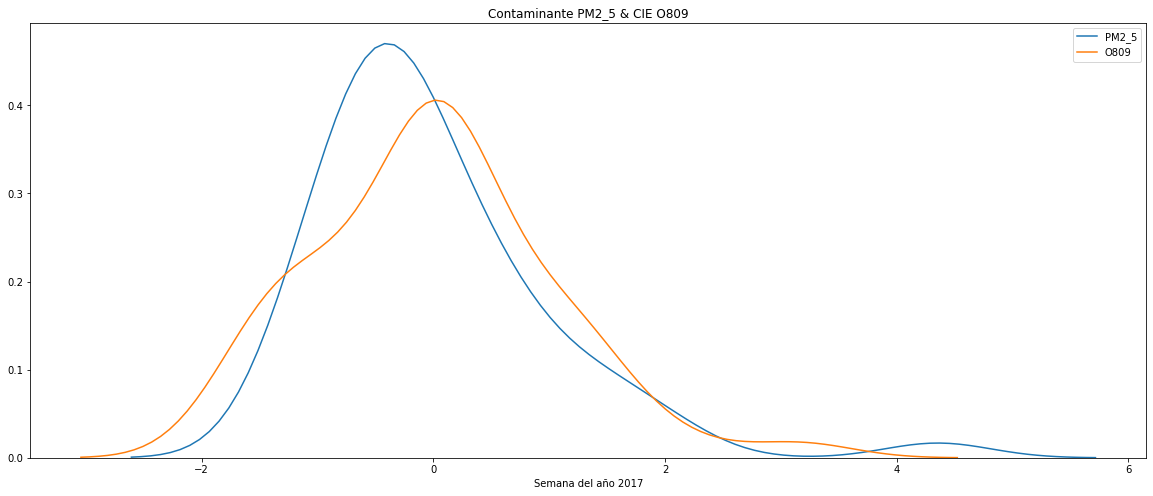


PM2_5 & N189


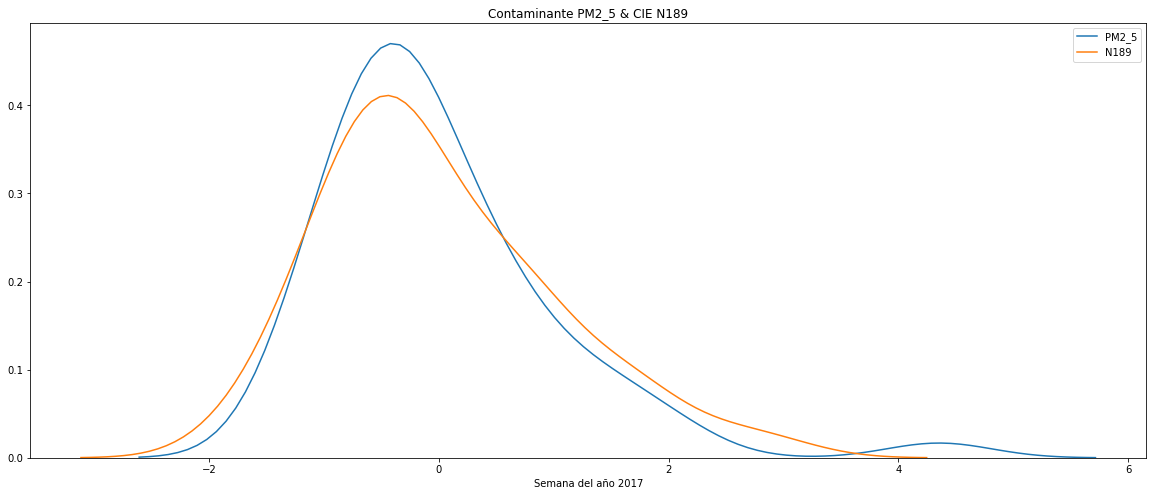


PM2_5 & O800


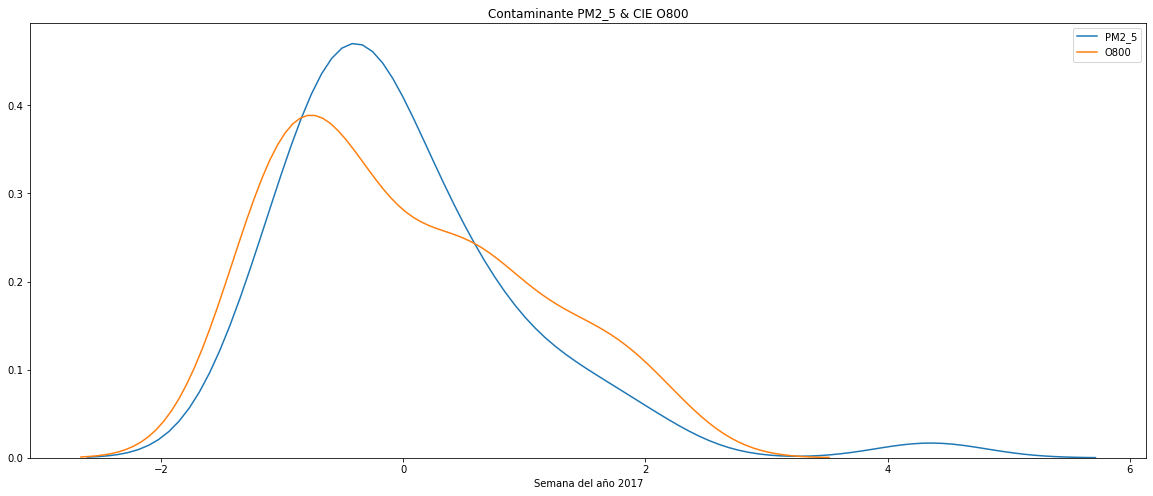


PM2_5 & O829


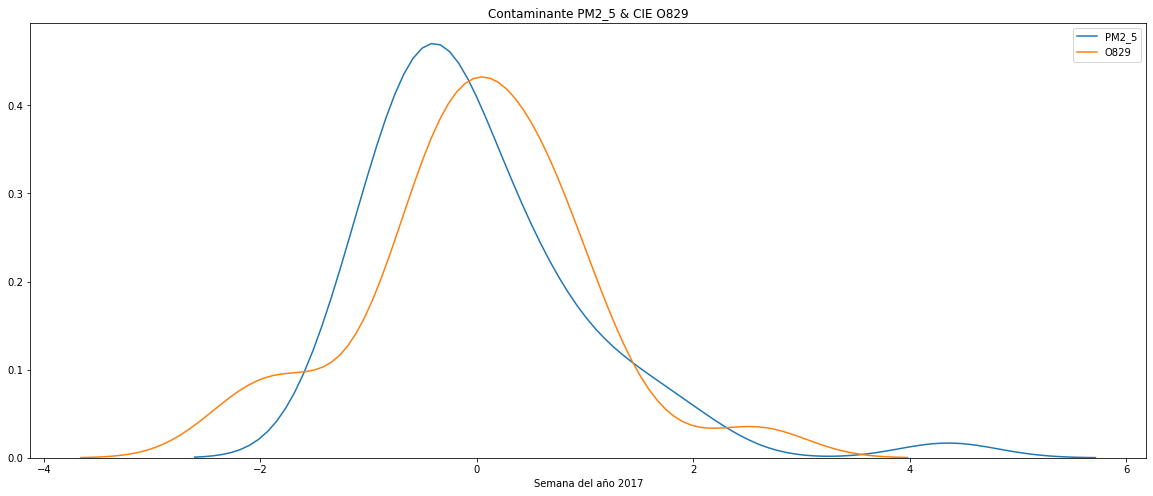


PM2_5 & O064


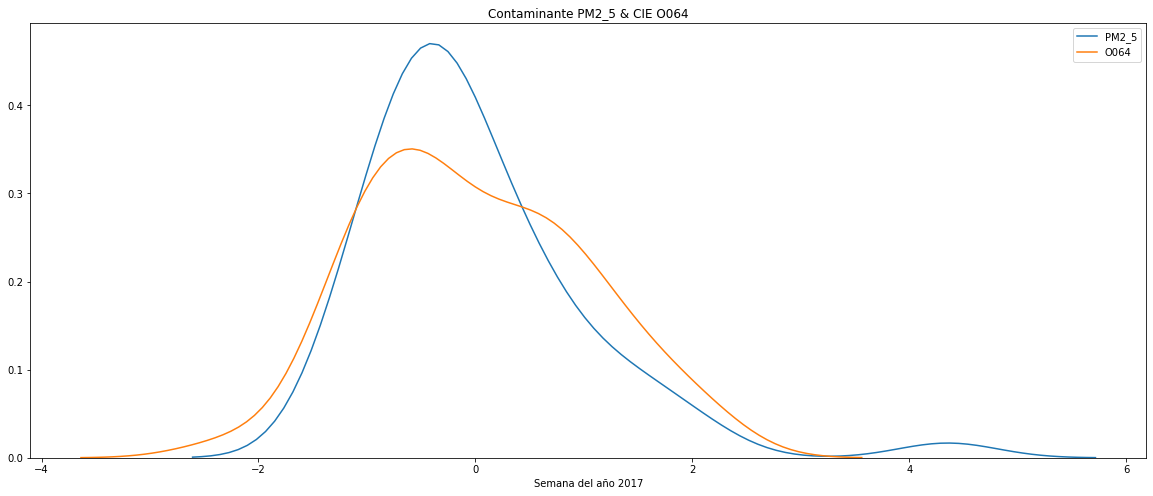


PM2_5 & N185


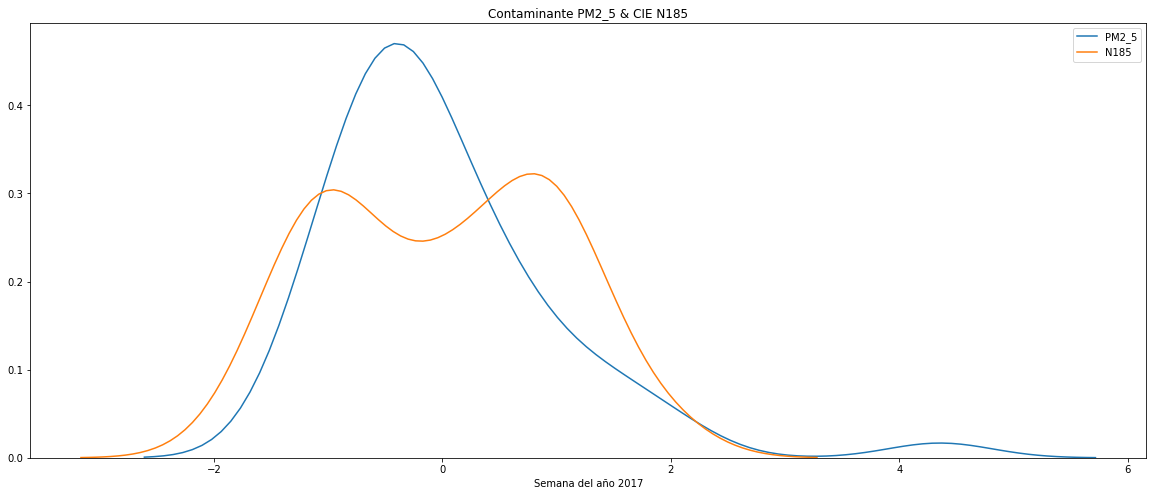


PM2_5 & C509


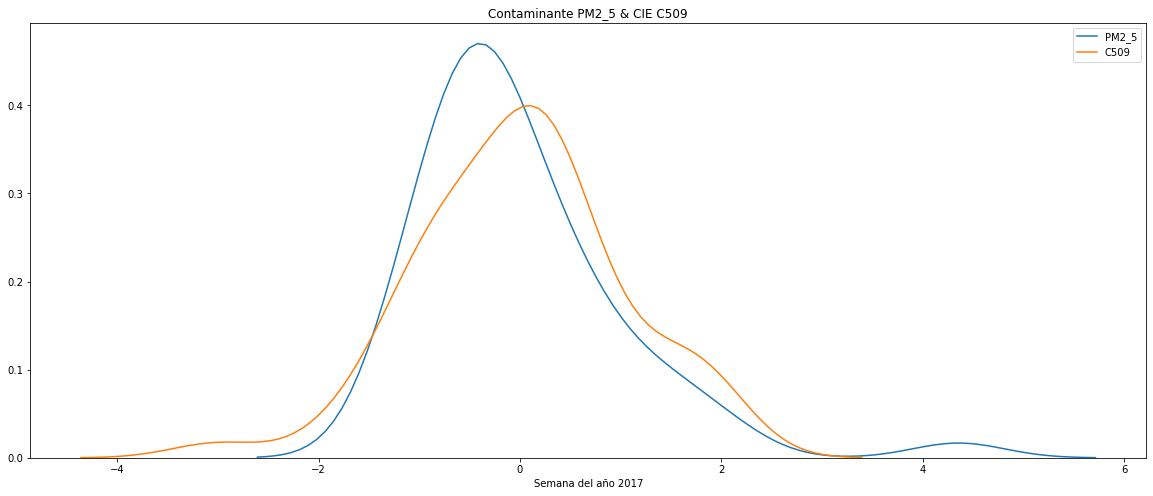


PM2_5 & H


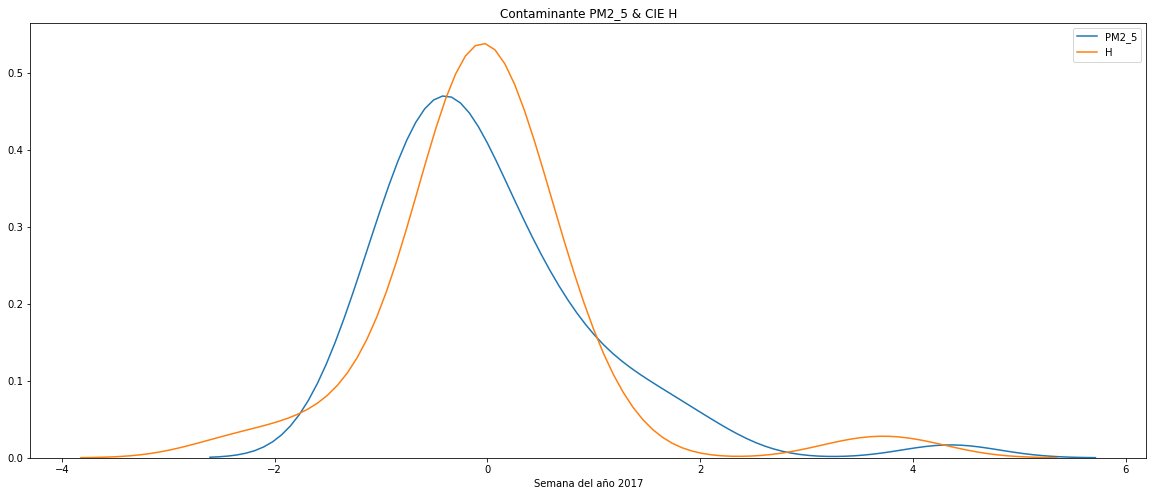


PM2_5 & I


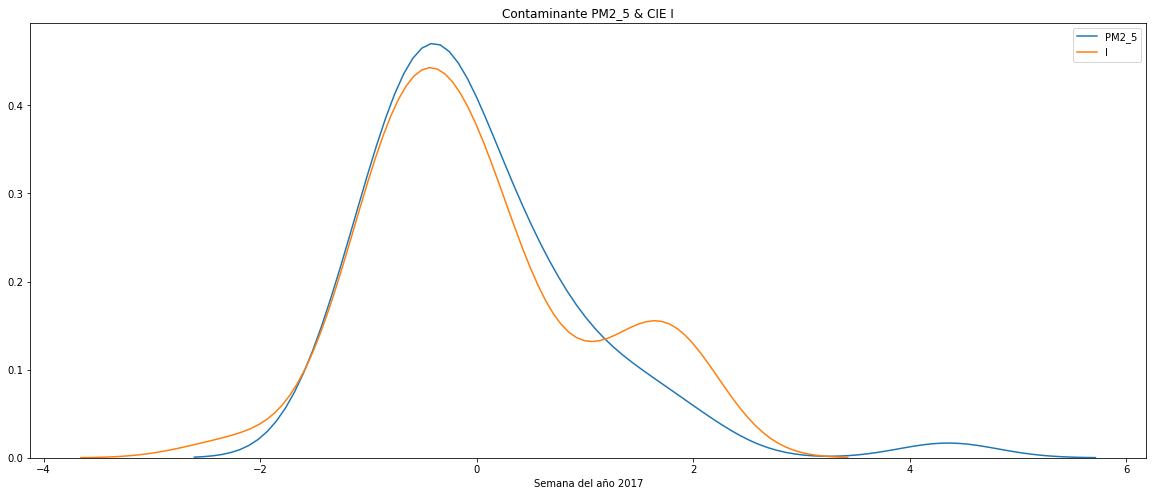


PM2_5 & J


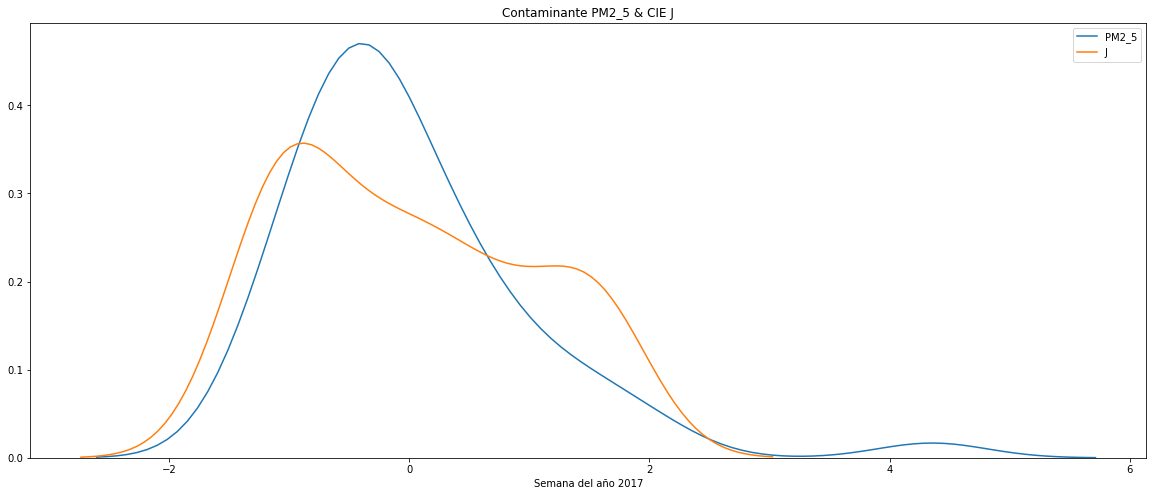

In [66]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2018)

In [67]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   PM2_5
0      2018-01-01 01   21.00
1      2018-01-01 02   27.00
2      2018-01-01 02    9.00
3      2018-01-01 02   18.00
4      2018-01-01 02   25.00
...              ...     ...
55746  2018-12-31 23   22.58
55747  2018-12-31 23  199.00
55748  2018-12-31 23  111.00
55749  2018-12-31 23  295.00
55750  2018-12-31 23    8.00

[55751 rows x 2 columns]

In [68]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   PM2_5
0     2018-01-01 01:00:00   21.00
1     2018-01-01 02:00:00   27.00
2     2018-01-01 02:00:00    9.00
3     2018-01-01 02:00:00   18.00
4     2018-01-01 02:00:00   25.00
...                   ...     ...
55746 2018-12-31 23:00:00   22.58
55747 2018-12-31 23:00:00  199.00
55748 2018-12-31 23:00:00  111.00
55749 2018-12-31 23:00:00  295.00
55750 2018-12-31 23:00:00    8.00

[55751 rows x 2 columns]

In [69]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   PM2_5  sem
0     2018-01-01 01:00:00   21.00    1
1     2018-01-01 02:00:00   27.00    1
2     2018-01-01 02:00:00    9.00    1
3     2018-01-01 02:00:00   18.00    1
4     2018-01-01 02:00:00   25.00    1
...                   ...     ...  ...
55746 2018-12-31 23:00:00   22.58    1
55747 2018-12-31 23:00:00  199.00    1
55748 2018-12-31 23:00:00  111.00    1
55749 2018-12-31 23:00:00  295.00    1
55750 2018-12-31 23:00:00    8.00    1

[55751 rows x 3 columns]

In [70]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=1000000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0       2018-03-11 00:00:00.000     Z524
1       2018-03-15 00:00:00.000     D259
2       2018-04-07 00:00:00.000     M169
3       2018-04-06 00:00:00.000     Q539
4       2018-04-19 00:00:00.000     N185
...                         ...      ...
999995  2018-04-24 00:00:00.000     E042
999996  2018-04-24 00:00:00.000     K802
999997  2018-04-27 00:00:00.000     K603
999998  2018-04-28 00:00:00.000     R69X
999999  2018-04-26 00:00:00.000     M179

[1000000 rows x 2 columns]

In [71]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0      2018-03-11     Z524   11
1      2018-03-15     D259   11
2      2018-04-07     M169   14
3      2018-04-06     Q539   14
4      2018-04-19     N185   16
...           ...      ...  ...
999995 2018-04-24     E042   17
999996 2018-04-24     K802   17
999997 2018-04-27     K603   17
999998 2018-04-28     R69X   17
999999 2018-04-26     M179   17

[1000000 rows x 3 columns]

In [72]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17995
2     18415
3     19382
4     19381
5     19586
6     18117
7     19495
8     19463
9     19664
10    19664
11    20214
12    19257
13    17852
14    18507
15    19268
16    19680
17    19987
18    18283
19    19175
20    19921
21    20048
22    19846
23    19602
24    19141
25    18905
26    18857
27    19181
28    19413
29    19496
30    19698
31    19275
32    19323
33    19547
34    19931
35    19964
36    20534
37    20509
38    20569
39    19922
40    20303
41    19961
42    19705
43    19605
44    18409
45    19046
46    19528
47    17902
48    18747
49    18328
50    18415
51    17870
52    15114
Name: sem, dtype: int64

In [73]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem    PM2_5
0     1  27.9914
1     2  26.5193
2     3  25.0157
3     4  26.2211
4     5  23.1026
5     6  32.8609
6     7  29.9677
7     8   26.029
8     9  27.0983
9    10  23.1529
10   11  18.6714
11   12  20.3861
12   13  25.7156
13   14  24.8143
14   15  22.4036
15   16  21.9618
16   17  18.8845
17   18  25.2361
18   19  20.8677
19   20  21.4635
20   21   17.285
21   22   21.218
22   23  22.1307
23   24  20.4814
24   25  21.4042
25   26  24.5818
26   27  32.5424
27   28   24.478
28   29  26.4108
29   30  26.0554
30   31  14.6743
31   32  12.8112
32   33  18.8583
33   34  11.6557
34   35  13.0539
35   36  14.1695
36   37  9.45271
37   38  15.1969
38   39  14.5479
39   40  11.6915
40   41  13.3811
41   42  12.4765
42   43   24.633
43   44  20.2429
44   45  22.2149
45   46  23.9592
46   47  25.8812
47   48  29.4551
48   49  20.3027
49   50  22.5603
50   51  27.1727
51   52  25.9472


2018

PM2_5 & O809


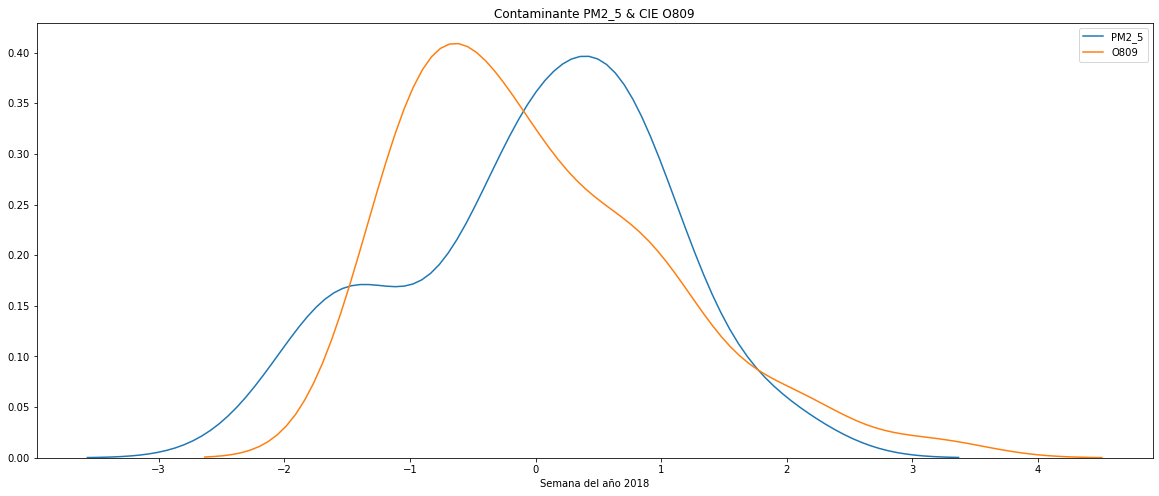


PM2_5 & O800


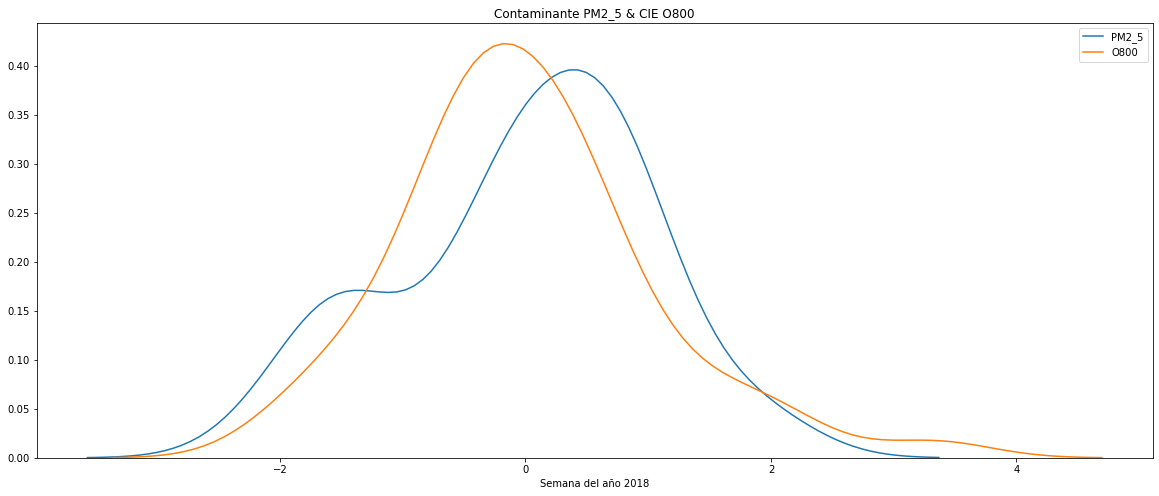


PM2_5 & O829


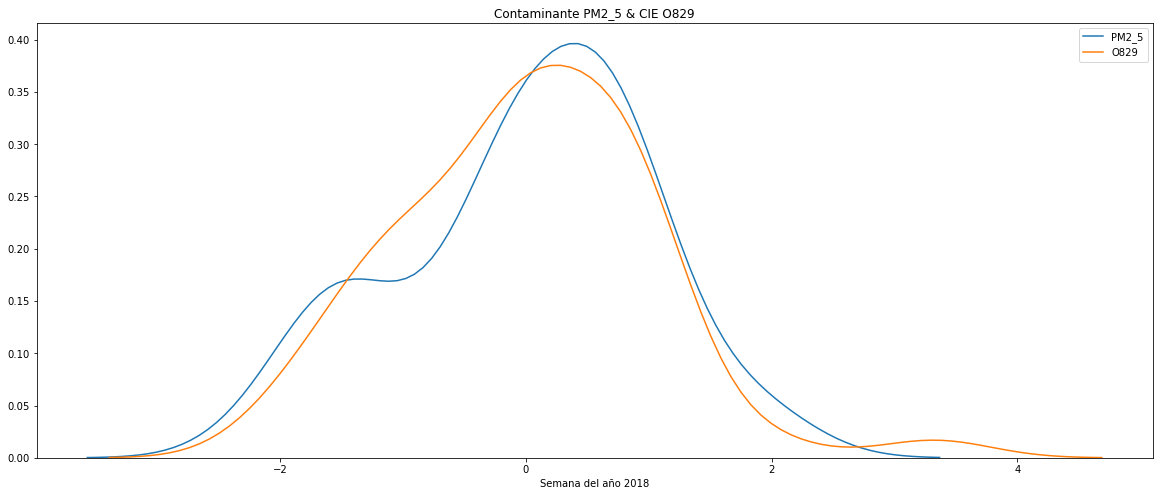


PM2_5 & N189


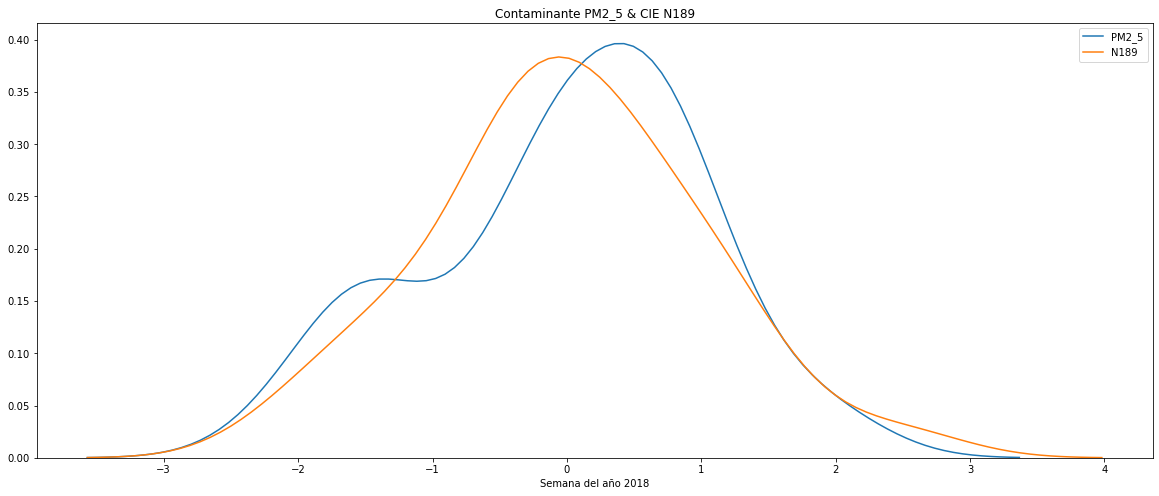


PM2_5 & O064


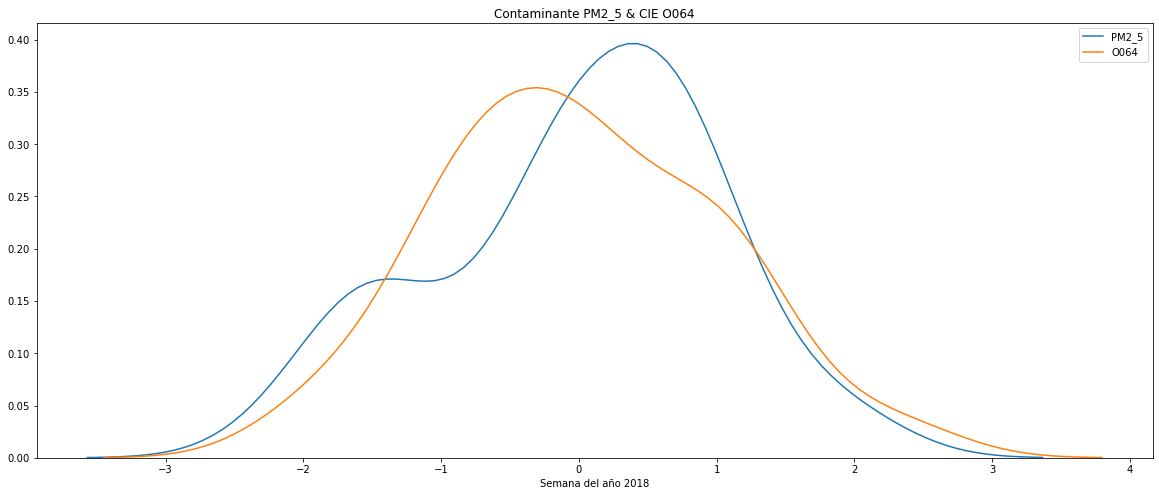


PM2_5 & C509


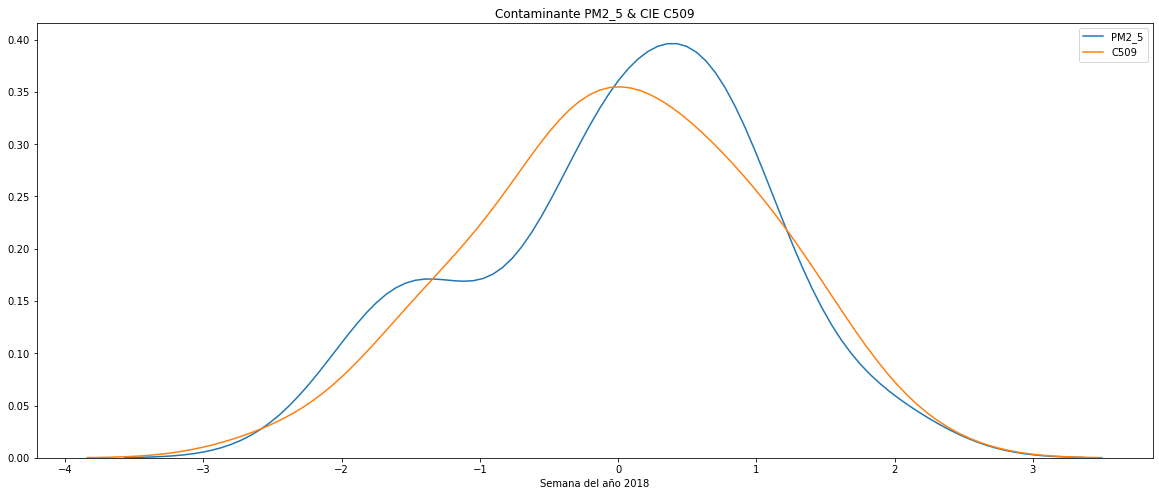


PM2_5 & O342


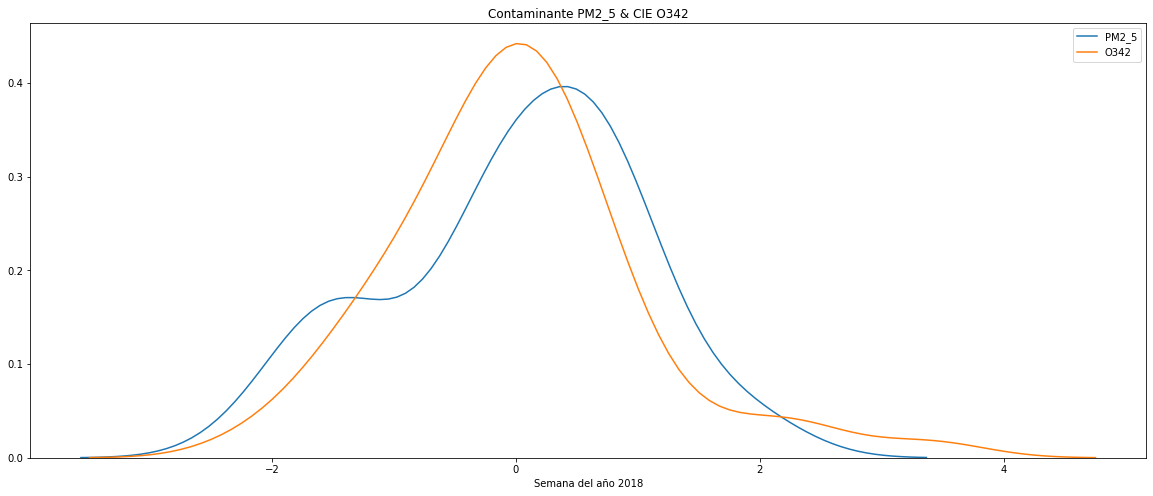


PM2_5 & H


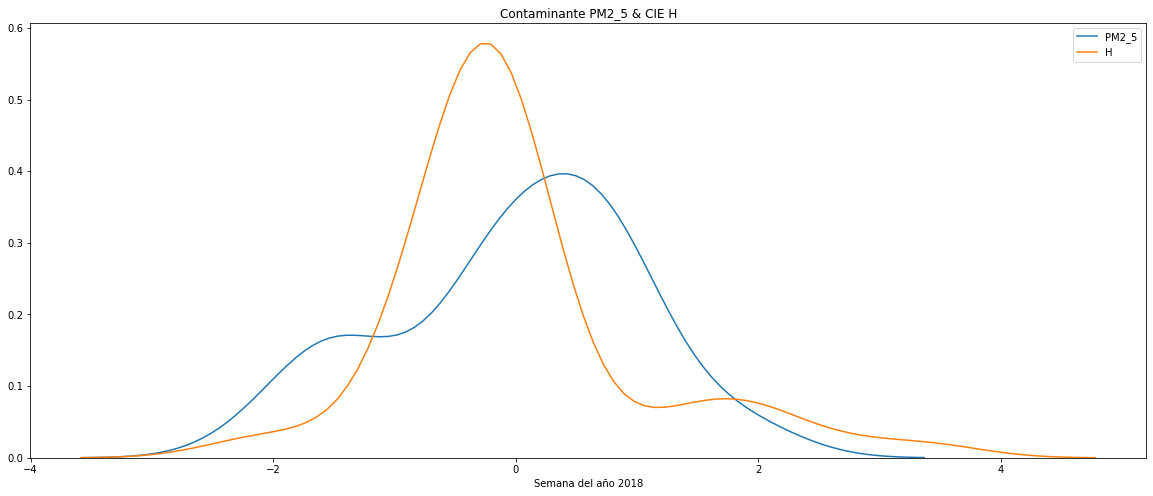


PM2_5 & I


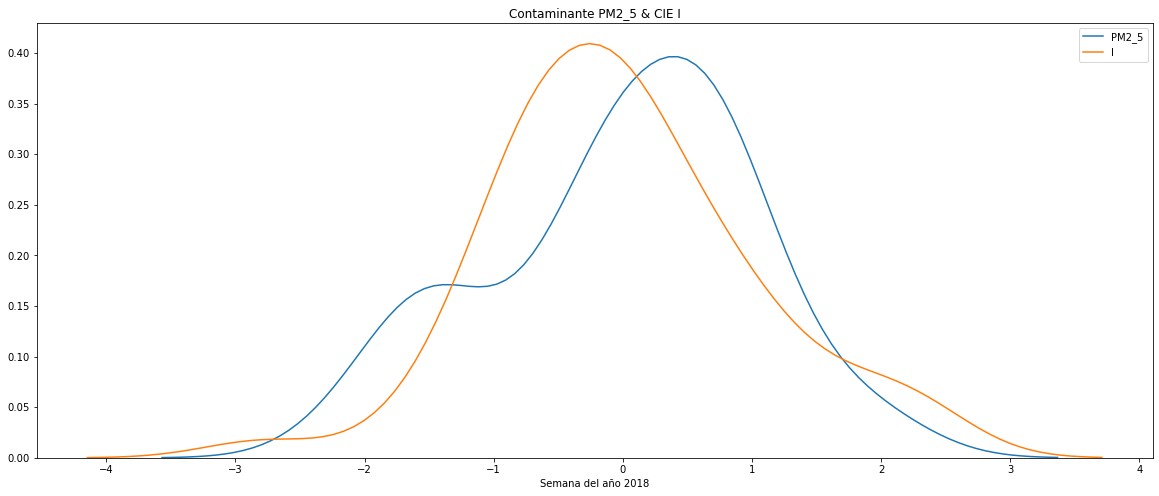


PM2_5 & J


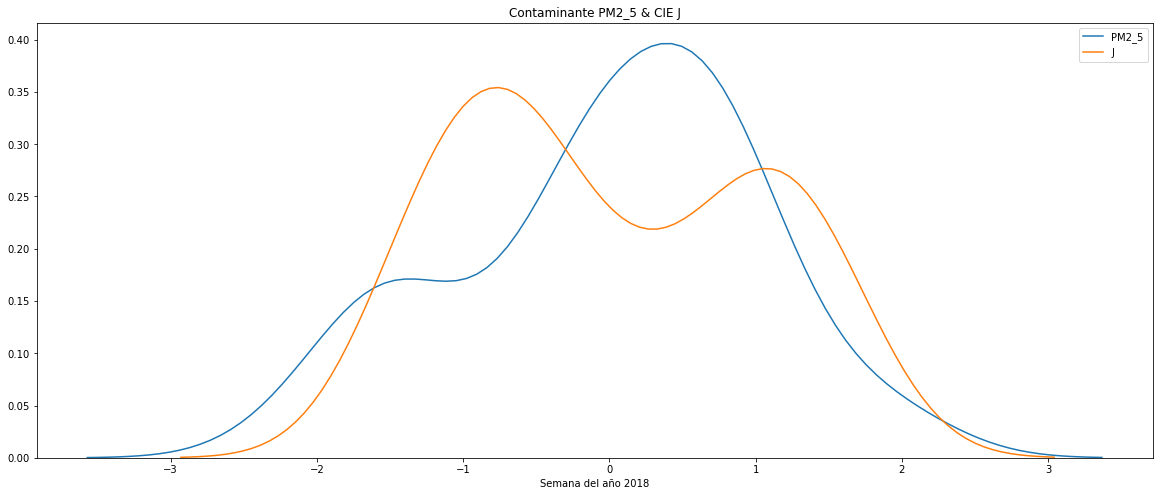

In [74]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1